<a href="https://colab.research.google.com/github/TimH2024/MSC-M5-Project/blob/main/M5ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPU Usage

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Jul 24 07:06:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


# Load Libraries

In [ ]:
import pandas as pd
import numpy as pn
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Quick Look at the two property datasets

In [ ]:
# Read in the data sets
dataset = pd.read_csv('/content/Datasetv2.csv')
property_dataset = pd.read_csv('/content/Property data  raw 2.csv')

Quick look at the dataset provided by Centaline Properties (essentially a list of 156,000 property transactions in Hong Kong over a period of 3 years)

In [ ]:
dataset.head(20)

,Unnamed: 0,date,address,price,changes,saleable_area(ft^2),unit_rate,district,Tower,Flat,Phase,Block,Rental,Public Housing,floor
0,0,9/3/2023,"The Long Beach, Tower 7, Middle Floor, Flat D",33000,--,816,40,Kowloon Kowloon City District,7,D,NaN,NaN,True,False,13.0
1,1,9/3/2023,"One Kai Tak, II, Tower 3, Upper Floor, Flat H",15800,--,375,42,Kowloon Kowloon City District,3,H,NaN,NaN,True,False,22.0
2,2,8/3/2023,"Sky Tower, Block 1, Lower Floor, Flat B",18800,--,520,36,Kowloon Kowloon City District,NaN,B,NaN,1,True,False,7.0
3,3,8/3/2023,"Hampton Place, Tower 2, Upper Floor, Flat F",17000,--,429,40,Kowloon Kowloon City District,2,F,NaN,NaN,True,False,22.0
4,4,8/3/2023,"Skypark, Upper Floor, Flat A5",18000,--,407,44,Kowloon Kowloon City District,NaN,A,NaN,NaN,True,False,22.0
5,5,8/3/2023,"Eltanin Square Mile, Tower 1, Upper Floor, Flat G",14300,--,255,56,Kowloon Kowloon City District,1,G,NaN,NaN,True,False,22.0
6,6,8/3/2023,"Cetus Square Mile, Tower 1, Lower Floor, Flat G",12000,--,194,62,Kowloon Kowloon City District,1,G,NaN,NaN,True,False,7.0
7,7,8/3/2023,"Metro Harbour View, Phase 2, Tower 10, Upper F...",6680000,--,423,15792,Kowloon Kowloon City District,10,B,2,NaN,False,False,22.0
8,8,8/3/2023,"Metro Harbour View, Phase 1, Tower 3, Upper Fl...",16000,--,386,41,Kowloon Kowloon City District,3,B,1,NaN,True,False,22.0
9,9,8/3/2023,"Celestial Heights, Phase 2, 22 Celestial Avenu...",38000,--,"1,155",33,Kowloon Kowloon City District,NaN,NaN,2,NaN,True,False,13.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159676 entries, 0 to 159675
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           159676 non-null  int64  
 1   date                 159676 non-null  object 
 2   address              159676 non-null  object 
 3   price                159676 non-null  int64  
 4   changes              159676 non-null  object 
 5   saleable_area(ft^2)  159676 non-null  object 
 6   unit_rate            159676 non-null  int64  
 7   district             159676 non-null  object 
 8   Tower                60395 non-null   object 
 9   Flat                 152252 non-null  object 
 10  Phase                48336 non-null   object 
 11  Block                54679 non-null   object 
 12  Rental               159676 non-null  bool   
 13  Public Housing       159676 non-null  bool   
 14  floor                159676 non-null  float64
dtypes: bool(2), float

Quick look at the macro economic indicies dataset which contains indicators that could impact the change in property prices. The information is based on statistics provided by the Government of Hong Kong

In [ ]:
# Create a dictionary of descriptions
descriptions = {
    'CPI': 'Consumer Price Index',
    'IR': 'Interest Rate',
    'MW': 'Monthly Wage',
    'M3': 'Money Supply M3',
    'SD': 'Savings Deposit',
    'UR': 'Unemployment Rate',
    'GDP': 'Gross Domestic Product',
    'CI': 'Consumer Confidence Index',
    'SM': 'Stock Market',
    'LTV': 'Loan to Value',
    'HS': 'Housing Starts',
    'SOLD': 'Number of Properties Sold',
    'PG': 'Population Growth',
    'CG': 'China Growth',
    'PI': 'Property Index'
}

# Map /add descriptions to the dataset_datasetFrame
property_dataset['Description'] = property_dataset['Unnamed: 0'].map(descriptions)

# Display the updated dataset_datasetFrame
property_dataset.head(20)

,Unnamed: 0,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1,2023Q2,2023Q3,2023Q4,Description
0,CPI,0.80,0.80,0.80,0.80,0.90,0.90,0.90,0.90,1.80,1.80,1.80,1.80,2.00,2.00,2.00,2.00,Consumer Price Index
1,IR,2.00,0.86,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.75,2.00,3.50,4.75,5.50,5.75,5.75,Interest Rate
2,MW,17.00,17.00,17.10,16.90,16.80,17.00,17.20,17.20,17.10,17.30,17.50,17.60,17.70,18.00,18.30,18.40,Monthly Wage
3,M3,14.80,14.90,15.90,15.60,15.90,16.00,16.00,16.20,16.50,16.30,16.30,16.40,16.50,16.50,16.80,17.10,Money Supply M3
4,SD,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.08,0.08,0.08,0.08,0.08,Savings Deposit
5,UR,3.70,5.90,6.20,6.20,7.20,6.00,4.60,4.10,4.50,5.10,4.10,3.70,3.30,3.00,2.90,2.90,Unemployment Rate
6,GDP,86.24,86.24,86.24,86.24,92.23,92.23,92.23,92.23,89.96,89.96,89.96,89.96,91.40,91.40,91.40,91.40,Gross Domestic Product
7,CI,62.90,52.30,59.80,63.80,66.60,66.80,68.00,63.40,50.60,53.70,43.90,28.30,66.10,61.00,52.60,51.00,Consumer Confidence Index
8,SM,27.90,24.20,25.10,26.50,28.90,29.10,24.80,23.99,21.91,20.72,17.75,19.90,20.58,19.45,17.95,17.45,Stock Market
9,LTV,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,Loan to Value


In [ ]:
property_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   15 non-null     object 
 1   2020Q1       15 non-null     float64
 2   2020Q2       15 non-null     float64
 3   2020Q3       15 non-null     float64
 4   2020Q4       15 non-null     float64
 5   2021Q1       15 non-null     float64
 6   2021Q2       15 non-null     float64
 7   2021Q3       15 non-null     float64
 8   2021Q4       15 non-null     float64
 9   2022Q1       15 non-null     float64
 10  2022Q2       15 non-null     float64
 11  2022Q3       15 non-null     float64
 12  2022Q4       15 non-null     float64
 13  2023Q1       15 non-null     float64
 14  2023Q2       15 non-null     float64
 15  2023Q3       15 non-null     float64
 16  2023Q4       15 non-null     float64
 17  Description  15 non-null     object 
dtypes: float64(16), object(2)
memory usage: 2.2+ KB


# Merge both datasets and switch around columns of the macro economic indicies dataset

In [ ]:
# Merger dataset and pivot row and columns of peoperty dataset
# Define the function to convert date to year-quarter format
def get_year_quarter(date_str):
    date_formats = ['%d-%m-%y', '%d/%m/%y', '%Y-%m-%d', '%m/%d/%y', '%d.%m.%Y', '%d-%m-%Y', '%d/%m/%Y']
    for fmt in date_formats:
        try:
            date = datetime.strptime(date_str, fmt)
            year = date.year
            quarter = (date.month - 1) // 3 + 1
            return date.strftime('%d-%m-%y'), f"{year}Q{quarter}"
        except ValueError:
            continue
    raise ValueError(f"Date format not recognized: {date_str}")

# Extract date and quarter info from the dataset
dataset[['date', 'YearQuarter']] = dataset['date'].apply(lambda x: pd.Series(get_year_quarter(x)))

# Melt the property data to have a long format
property_dataset_melted = property_dataset.melt(id_vars=[property_dataset.columns[0]], var_name='YearQuarter', value_name='Value')

# Pivot the melted property data to have a wide format
property_dataset_pivoted = property_dataset_melted.pivot(index='YearQuarter', columns=property_dataset.columns[0], values='Value').reset_index()

# Merge the datasets on the YearQuarter column
merged_dataset = pd.merge(dataset, property_dataset_pivoted, on='YearQuarter', how='left')

# Add quarter info in a new column
merged_dataset['Quarter'] = merged_dataset['YearQuarter'].apply(lambda x: x.split('Q')[1])

# Save the merged dataset to a new CSV file
merged_dataset.to_csv('Merged_Datasetv2.csv', index=False)

In [ ]:
# Check year quarter has worked
merged_dataset['YearQuarter'].unique()

array(['2023Q1', '2022Q4', '2022Q3', '2022Q2', '2022Q1', '2021Q4',
       '2021Q3', '2021Q2', '2021Q1', '2020Q4', '2020Q3', '2020Q2',
       '2020Q1'], dtype=object)

# Quick look at the merged dataset

In [ ]:
merged_dataset.head(50)

,Unnamed: 0,date,address,price,changes,saleable_area(ft^2),unit_rate,district,Tower,Flat,...,LTV,M3,MW,PG,PI,SD,SM,SOLD,UR,Quarter
0,0,09-03-23,"The Long Beach, Tower 7, Middle Floor, Flat D",33000,--,816,40,Kowloon Kowloon City District,7,D,...,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,1
1,1,09-03-23,"One Kai Tak, II, Tower 3, Upper Floor, Flat H",15800,--,375,42,Kowloon Kowloon City District,3,H,...,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,1
2,2,08-03-23,"Sky Tower, Block 1, Lower Floor, Flat B",18800,--,520,36,Kowloon Kowloon City District,NaN,B,...,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,1
3,3,08-03-23,"Hampton Place, Tower 2, Upper Floor, Flat F",17000,--,429,40,Kowloon Kowloon City District,2,F,...,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,1
4,4,08-03-23,"Skypark, Upper Floor, Flat A5",18000,--,407,44,Kowloon Kowloon City District,NaN,A,...,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,1
5,5,08-03-23,"Eltanin Square Mile, Tower 1, Upper Floor, Flat G",14300,--,255,56,Kowloon Kowloon City District,1,G,...,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,1
6,6,08-03-23,"Cetus Square Mile, Tower 1, Lower Floor, Flat G",12000,--,194,62,Kowloon Kowloon City District,1,G,...,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,1
7,7,08-03-23,"Metro Harbour View, Phase 2, Tower 10, Upper F...",6680000,--,423,15792,Kowloon Kowloon City District,10,B,...,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,1
8,8,08-03-23,"Metro Harbour View, Phase 1, Tower 3, Upper Fl...",16000,--,386,41,Kowloon Kowloon City District,3,B,...,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,1
9,9,08-03-23,"Celestial Heights, Phase 2, 22 Celestial Avenu...",38000,--,"1,155",33,Kowloon Kowloon City District,NaN,NaN,...,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,1


In [ ]:
# Look at the number of null values for each column
null_counts = merged_dataset.isnull().sum()

# Display the number of null values for each column
print("Number of null values for each column:")
print(null_counts)

Number of null values for each column:
Unnamed: 0                  0
date                        0
address                     0
price                       0
changes                     0
saleable_area(ft^2)         0
unit_rate                   0
district                    0
Tower                   99281
Flat                     7424
Phase                  111340
Block                  104997
Rental                      0
Public Housing              0
floor                       0
YearQuarter                 0
CG                          0
CI                          0
CPI                         0
GDP                         0
HS                          0
IR                          0
LTV                         0
M3                          0
MW                          0
PG                          0
PI                          0
SD                          0
SM                          0
SOLD                        0
UR                          0
Quarter                     0
d

In [ ]:
# Look at the data types for future ML
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159676 entries, 0 to 159675
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           159676 non-null  int64  
 1   date                 159676 non-null  object 
 2   address              159676 non-null  object 
 3   price                159676 non-null  int64  
 4   changes              159676 non-null  object 
 5   saleable_area(ft^2)  159676 non-null  object 
 6   unit_rate            159676 non-null  int64  
 7   district             159676 non-null  object 
 8   Tower                60395 non-null   object 
 9   Flat                 152252 non-null  object 
 10  Phase                48336 non-null   object 
 11  Block                54679 non-null   object 
 12  Rental               159676 non-null  bool   
 13  Public Housing       159676 non-null  bool   
 14  floor                159676 non-null  float64
 15  YearQuarter      

In [ ]:
# Find column names
merged_dataset.columns


Index(['Unnamed: 0', 'date', 'address', 'price', 'changes',
       'saleable_area(ft^2)', 'unit_rate', 'district', 'Tower', 'Flat',
       'Phase', 'Block', 'Rental', 'Public Housing', 'floor', 'YearQuarter',
       'CG', 'CI', 'CPI', 'GDP', 'HS', 'IR', 'LTV', 'M3', 'MW', 'PG', 'PI',
       'SD', 'SM', 'SOLD', 'UR', 'Quarter'],
      dtype='object')

In [ ]:
# The reoritntation of the columns in thr naco data set has converted them from float to objects
# Convert objects to float for future ML

# Assuming merged_dataset is already defined and is a pandas DataFrame

# Define the columns to be converted to floats
columns_to_convert = ['CG', 'CI', 'CPI', 'GDP', 'HS', 'IR', 'LTV', 'M3', 'MW', 'PG', 'PI', 'SD', 'SM', 'SOLD', 'UR']

# Convert the specified columns to floats
for column in columns_to_convert:
    merged_dataset[column] = pd.to_numeric(merged_dataset[column], errors='coerce').astype(float)

# Display the first few rows to ensure conversion
print(merged_dataset.head())

   Unnamed: 0      date                                        address  price  \
0           0  09-03-23  The Long Beach, Tower 7, Middle Floor, Flat D  33000   
1           1  09-03-23  One Kai Tak, II, Tower 3, Upper Floor, Flat H  15800   
2           2  08-03-23        Sky Tower, Block 1, Lower Floor, Flat B  18800   
3           3  08-03-23    Hampton Place, Tower 2, Upper Floor, Flat F  17000   
4           4  08-03-23                  Skypark, Upper Floor, Flat A5  18000   

  changes saleable_area(ft^2)  unit_rate                       district Tower  \
0      --                 816         40  Kowloon Kowloon City District     7   
1      --                 375         42  Kowloon Kowloon City District     3   
2      --                 520         36  Kowloon Kowloon City District   NaN   
3      --                 429         40  Kowloon Kowloon City District     2   
4      --                 407         44  Kowloon Kowloon City District   NaN   

  Flat  ...  LTV    M3    

In [ ]:
# Check data types after conversion
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159676 entries, 0 to 159675
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           159676 non-null  int64  
 1   date                 159676 non-null  object 
 2   address              159676 non-null  object 
 3   price                159676 non-null  int64  
 4   changes              159676 non-null  object 
 5   saleable_area(ft^2)  159676 non-null  object 
 6   unit_rate            159676 non-null  int64  
 7   district             159676 non-null  object 
 8   Tower                60395 non-null   object 
 9   Flat                 152252 non-null  object 
 10  Phase                48336 non-null   object 
 11  Block                54679 non-null   object 
 12  Rental               159676 non-null  bool   
 13  Public Housing       159676 non-null  bool   
 14  floor                159676 non-null  float64
 15  YearQuarter      

In [ ]:
# Calculate the number of null values for each column aafter conversion
null_counts = merged_dataset.isnull().sum()

# Display the number of null values for each column
print("Number of null values for each column:")
print(null_counts)

Number of null values for each column:
Unnamed: 0                  0
date                        0
address                     0
price                       0
changes                     0
saleable_area(ft^2)         0
unit_rate                   0
district                    0
Tower                   99281
Flat                     7424
Phase                  111340
Block                  104997
Rental                      0
Public Housing              0
floor                       0
YearQuarter                 0
CG                          0
CI                          0
CPI                         0
GDP                         0
HS                          0
IR                          0
LTV                         0
M3                          0
MW                          0
PG                          0
PI                          0
SD                          0
SM                          0
SOLD                        0
UR                          0
Quarter                     0
d

# Fixing the Price

In [ ]:
# In data set Price is rounded so their is a need to recalculate the exact called new_price based on
# This can be done using the saleable area x unit rate
# However, first it is necessasry to convert the saleable area data from object to a float

# Identify and display non-numeric values
non_numeric_values = merged_dataset[~merged_dataset['saleable_area(ft^2)'].str.replace('.', '', 1).str.isdigit()]
print("Non-Numeric Values Before Cleaning")
print(non_numeric_values)

# Clean the dataset_dataset
merged_dataset['saleable_area(ft^2)'] = merged_dataset['saleable_area(ft^2)'].str.replace(',', '')  # Remove commas
merged_dataset['saleable_area(ft^2)'] = merged_dataset['saleable_area(ft^2)'].str.extract('(\d+\.?\d*)')[0]  # Extract numeric part

# Convert to float
merged_dataset['saleable_area(ft^2)'] = pd.to_numeric(merged_dataset['saleable_area(ft^2)'], errors='coerce')

# Display cleaned dataset_dataset types
print("Cleaned dataset_dataset Types")
print(merged_dataset.info())

# Check for remaining null values
print("Number of Null Values After Conversion:", merged_dataset['saleable_area(ft^2)'].isnull().sum())

Non-Numeric Values Before Cleaning
        Unnamed: 0      date  \
9                9  08-03-23   
11              11  08-03-23   
13              13  08-03-23   
25              25  08-03-23   
26              26  08-03-23   
...            ...       ...   
159531      174177  19-06-21   
159552      174198  18-06-21   
159586      174236  16-06-21   
159588      174238  16-06-21   
159649      174308  15-06-21   

                                                  address     price changes  \
9       Celestial Heights, Phase 2, 22 Celestial Avenu...     38000      --   
11      Residence Bel-Air, Phase 6 Bel-Air No. 8, Towe...     51000      --   
13      One Beacon Hill, Phase 1, Tower 3, Lower Floor...  76000000      --   
25      Laguna Verde, Phase 4(4A) Laguna Grande, Tower...  22800000      --   
26      Laguna Verde, Phase 4(4A) Laguna Grande, Tower...  21680000      --   
...                                                   ...       ...     ...   
159531  Taikoo Shing, Harbo

In [ ]:
# The existing Price column is not right (and rounded)
# Now create a new_price column with corrected figures

# Add a new 'price' column calculated as 'saleable_area(ft^2)' * 'unit_rate'
merged_dataset['new_price'] = merged_dataset['saleable_area(ft^2)'] * merged_dataset['unit_rate']

# Print the first 100 rows of the dataset_datasetFrame
print("First 20 rows of the dataset_datasetFrame with the new 'price' column:")
print(merged_dataset.head(100).to_string(index=False))

First 20 rows of the dataset_datasetFrame with the new 'price' column:
 Unnamed: 0     date                                                                             address    price changes  saleable_area(ft^2)  unit_rate                      district Tower Flat Phase Block  Rental  Public Housing  floor YearQuarter  CG   CI  CPI  GDP     HS   IR  LTV   M3   MW  PG     PI   SD    SM    SOLD  UR Quarter  new_price
          0 09-03-23                                       The Long Beach, Tower 7, Middle Floor, Flat D    33000      --                  816         40 Kowloon Kowloon City District     7    D   NaN   NaN    True           False   13.0      2023Q1 9.1 66.1  2.0 91.4 5250.0 4.75  0.5 16.5 17.7 8.0 -10.24 0.08 20.58 14509.0 3.3       1      32640
          1 09-03-23                                       One Kai Tak, II, Tower 3, Upper Floor, Flat H    15800      --                  375         42 Kowloon Kowloon City District     3    H   NaN   NaN    True           False 

In [ ]:
# Now drop the old price column from the datset

# Display the dataset_datasetFrame before dropping the column
print("Before Dropping 'price' Column:")
print(merged_dataset)

# Drop the 'price' column
merged_dataset = merged_dataset.drop(columns=['price'])

# Display the dataset_datasetFrame after dropping the column
print("\nAfter Dropping 'price' Column:")
print(merged_dataset)

Before Dropping 'price' Column:
        Unnamed: 0      date  \
0                0  09-03-23   
1                1  09-03-23   
2                2  08-03-23   
3                3  08-03-23   
4                4  08-03-23   
...            ...       ...   
159671      174331  11-06-21   
159672      174332  11-06-21   
159673      174333  11-06-21   
159674      174334  11-06-21   
159675      174335  11-06-21   

                                                  address     price changes  \
0           The Long Beach, Tower 7, Middle Floor, Flat D     33000      --   
1           One Kai Tak, II, Tower 3, Upper Floor, Flat H     15800      --   
2                 Sky Tower, Block 1, Lower Floor, Flat B     18800      --   
3             Hampton Place, Tower 2, Upper Floor, Flat F     17000      --   
4                           Skypark, Upper Floor, Flat A5     18000      --   
...                                                   ...       ...     ...   
159671              Heng Fa Ch

# Deducting rental prices from Database

In [ ]:
# The exercise is about sales prices of properties and not rental prices so drop these from the dataset
# The database contains both so need to drop/delete the rental data
# Delete rental properties from the merged_dataset
merged_dataset = merged_dataset[merged_dataset['Rental'] != True]
print (merged_dataset)

        Unnamed: 0      date  \
7                7  08-03-23   
13              13  08-03-23   
14              14  08-03-23   
15              15  08-03-23   
16              16  08-03-23   
...            ...       ...   
159671      174331  11-06-21   
159672      174332  11-06-21   
159673      174333  11-06-21   
159674      174334  11-06-21   
159675      174335  11-06-21   

                                                  address changes  \
7       Metro Harbour View, Phase 2, Tower 10, Upper F...      --   
13      One Beacon Hill, Phase 1, Tower 3, Lower Floor...      --   
14      Whampoa Garden, Phase 7 Cotton Tree Mansions, ...      --   
15                        Cheong Fu Mansion, 12/F, Flat B      --   
16                       Sky Tower, Block 3, 29/F, Flat B      --   
...                                                   ...     ...   
159671              Heng Fa Chuen, Block 29, 13/F, Flat 7      --   
159672  Taikoo Shing, Kao Shan Terrace, (T-07) Tien Sh...    15

# Deducting Public Housing from the dataset

In [ ]:
# The exercise is about sales of private residential property so need to delete public housing from the dataset
# Delete public housing properties from the merged_dataset
merged_dataset = merged_dataset[merged_dataset['Public Housing'] != True]
print (merged_dataset)

        Unnamed: 0      date  \
7                7  08-03-23   
13              13  08-03-23   
14              14  08-03-23   
15              15  08-03-23   
16              16  08-03-23   
...            ...       ...   
159671      174331  11-06-21   
159672      174332  11-06-21   
159673      174333  11-06-21   
159674      174334  11-06-21   
159675      174335  11-06-21   

                                                  address changes  \
7       Metro Harbour View, Phase 2, Tower 10, Upper F...      --   
13      One Beacon Hill, Phase 1, Tower 3, Lower Floor...      --   
14      Whampoa Garden, Phase 7 Cotton Tree Mansions, ...      --   
15                        Cheong Fu Mansion, 12/F, Flat B      --   
16                       Sky Tower, Block 3, 29/F, Flat B      --   
...                                                   ...     ...   
159671              Heng Fa Chuen, Block 29, 13/F, Flat 7      --   
159672  Taikoo Shing, Kao Shan Terrace, (T-07) Tien Sh...    15

# Dropping columns not relevant to the price

In [ ]:
# Using dataset merged_dataset dataset_dataset
# Certain columns are not requred for ML and or are no applicable to pricing (based on research)
# Specify the columns to drop before
columns_to_remove = ['Unnamed: 0', 'date', 'address', 'changes', 'Tower', 'Flat', 'Phase', 'Block', 'Rental', 'Public Housing', 'floor', 'LTV', 'SOLD']

# Find the columns that actually exist in the dataset_datasetFrame
columns_in_merged_dataset = merged_dataset.columns
columns_to_remove_present = [col for col in columns_to_remove if col in columns_in_merged_dataset]

# Remove the specified columns that are present in the dataset_datasetFrame
merged_dataset = merged_dataset.drop(columns=columns_to_remove_present)

# Print the modified dataset_datasetFrame head
print("\nModified dataset_datasetFrame head:")
print(merged_dataset.head())

# Print the modified dataset_datasetFrame
print("\nModified dataset_datasetFrame column info:")
print(merged_dataset.info())


Modified dataset_datasetFrame head:
    saleable_area(ft^2)  unit_rate                       district YearQuarter  \
7                   423      15792  Kowloon Kowloon City District      2023Q1   
13                 2190      34703  Kowloon Kowloon City District      2023Q1   
14                  761      15857  Kowloon Kowloon City District      2023Q1   
15                  320      13717  Kowloon Kowloon City District      2023Q1   
16                  519      16541  Kowloon Kowloon City District      2023Q1   

     CG    CI  CPI   GDP      HS    IR    M3    MW   PG     PI    SD     SM  \
7   9.1  66.1  2.0  91.4  5250.0  4.75  16.5  17.7  8.0 -10.24  0.08  20.58   
13  9.1  66.1  2.0  91.4  5250.0  4.75  16.5  17.7  8.0 -10.24  0.08  20.58   
14  9.1  66.1  2.0  91.4  5250.0  4.75  16.5  17.7  8.0 -10.24  0.08  20.58   
15  9.1  66.1  2.0  91.4  5250.0  4.75  16.5  17.7  8.0 -10.24  0.08  20.58   
16  9.1  66.1  2.0  91.4  5250.0  4.75  16.5  17.7  8.0 -10.24  0.08  20.58   

 

In [ ]:
# Based on the cleaned data set look at the number of null values for each column
null_counts = merged_dataset.isnull().sum()

# Display the number of null values for each column
print("Number of null values for each column:")
print(null_counts)

Number of null values for each column:
saleable_area(ft^2)    0
unit_rate              0
district               0
YearQuarter            0
CG                     0
CI                     0
CPI                    0
GDP                    0
HS                     0
IR                     0
M3                     0
MW                     0
PG                     0
PI                     0
SD                     0
SM                     0
UR                     0
Quarter                0
new_price              0
dtype: int64


# One hot encode districts for later analysis

In [ ]:
# Location is important tomprice so need to consider district or location and adapt for ML
# Need to one hot encode district areas for later analysis
print("Contents of the 'district' column:")
print(merged_dataset['district'])

Contents of the 'district' column:
7         Kowloon Kowloon City District
13        Kowloon Kowloon City District
14        Kowloon Kowloon City District
15        Kowloon Kowloon City District
16        Kowloon Kowloon City District
                      ...              
159671        HKIsIand Eastern District
159672        HKIsIand Eastern District
159673        HKIsIand Eastern District
159674        HKIsIand Eastern District
159675        HKIsIand Eastern District
Name: district, Length: 109888, dtype: object


In [ ]:
merged_dataset['district'].unique()

array(['Kowloon Kowloon City District', 'Kowloon Kwun Tong District',
       'Kowloon Yau Tsim Mong District', 'Kowloon Wong Tai Sin District',
       'Kowloon Sham Shui Po District',
       'New Territories East Sha Tin District',
       'New Territories East Long Ping Estate',
       'New Territories East North District',
       'New Territories East Tai Po District', 'Kwai Tsing District',
       'Tsuen Wan District', 'Yuen Long District', 'Tuen Mun District',
       'New Territories West Islands District', 'Wan Chai District',
       'HKIsIand Southern District', 'Central and Western District',
       'HKIsIand Eastern District'], dtype=object)

In [ ]:
# District (location) will be important in determining property prices
# One Hot encode the districts so they can be used for further analysis
one_hot_encoded = pd.get_dummies(merged_dataset['district'], prefix='district')
unique_districts = merged_dataset['district'].unique()
label_mapping = {district: i+1 for i, district in enumerate(unique_districts)}
merged_dataset['district_encoded'] = merged_dataset['district'].map(label_mapping)

In [ ]:
# Check district types
change_indices = merged_dataset['district'].ne(merged_dataset['district'].shift())
print("Rows where the 'district' value changes:")
print(merged_dataset.loc[change_indices, 'district'])

Rows where the 'district' value changes:
7                 Kowloon Kowloon City District
9539                 Kowloon Kwun Tong District
19056            Kowloon Yau Tsim Mong District
28568             Kowloon Wong Tai Sin District
38048             Kowloon Sham Shui Po District
47564     New Territories East Sha Tin District
56727     New Territories East Long Ping Estate
65808       New Territories East North District
75365      New Territories East Tai Po District
84916                       Kwai Tsing District
92197                        Tsuen Wan District
100409                       Yuen Long District
109897                        Tuen Mun District
119229    New Territories West Islands District
125886                        Wan Chai District
133881               HKIsIand Southern District
141545             Central and Western District
151167                HKIsIand Eastern District
Name: district, dtype: object


In [ ]:
merged_dataset['district_encoded'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

In [ ]:
print(merged_dataset)

        saleable_area(ft^2)  unit_rate                       district  \
7                       423      15792  Kowloon Kowloon City District   
13                     2190      34703  Kowloon Kowloon City District   
14                      761      15857  Kowloon Kowloon City District   
15                      320      13717  Kowloon Kowloon City District   
16                      519      16541  Kowloon Kowloon City District   
...                     ...        ...                            ...   
159671                  643      18146      HKIsIand Eastern District   
159672                  536      20056      HKIsIand Eastern District   
159673                  620      19081      HKIsIand Eastern District   
159674                  580      21207      HKIsIand Eastern District   
159675                  580      22155      HKIsIand Eastern District   

       YearQuarter   CG    CI  CPI    GDP      HS    IR    M3    MW   PG  \
7           2023Q1  9.1  66.1  2.0  91.40  5250

# Dataset cleaning

In [ ]:

# Check the new column names
# Get column names as a list
column_names = merged_dataset.columns.tolist()
print(column_names)

['saleable_area(ft^2)', 'unit_rate', 'district', 'YearQuarter', 'CG', 'CI', 'CPI', 'GDP', 'HS', 'IR', 'M3', 'MW', 'PG', 'PI', 'SD', 'SM', 'UR', 'Quarter', 'new_price', 'district_encoded']


In [ ]:
# Consider dropping remaining object columns before analysis

# Check columns names
# Get column names as a list
column_names = merged_dataset.columns.tolist()
print(column_names)

['saleable_area(ft^2)', 'unit_rate', 'district', 'YearQuarter', 'CG', 'CI', 'CPI', 'GDP', 'HS', 'IR', 'M3', 'MW', 'PG', 'PI', 'SD', 'SM', 'UR', 'Quarter', 'new_price', 'district_encoded']


In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109888 entries, 7 to 159675
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   saleable_area(ft^2)  109888 non-null  int64  
 1   unit_rate            109888 non-null  int64  
 2   district             109888 non-null  object 
 3   YearQuarter          109888 non-null  object 
 4   CG                   109888 non-null  float64
 5   CI                   109888 non-null  float64
 6   CPI                  109888 non-null  float64
 7   GDP                  109888 non-null  float64
 8   HS                   109888 non-null  float64
 9   IR                   109888 non-null  float64
 10  M3                   109888 non-null  float64
 11  MW                   109888 non-null  float64
 12  PG                   109888 non-null  float64
 13  PI                   109888 non-null  float64
 14  SD                   109888 non-null  float64
 15  SM                   1

# Normalise the variables for further ML analyis

In [ ]:
# Need to normalise the macro values
from sklearn.preprocessing import MinMaxScaler

# List of columns to normalize
columns_to_normalize = ['CG', 'CI', 'CPI', 'GDP', 'HS', 'IR', 'M3', 'MW', 'PG', 'SD', 'SM', 'UR']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the specified columns
merged_dataset[columns_to_normalize] = scaler.fit_transform(merged_dataset[columns_to_normalize])

# Display the first few rows of the normalized dataset
print(merged_dataset.head())

    saleable_area(ft^2)  unit_rate                       district YearQuarter  \
7                   423      15792  Kowloon Kowloon City District      2023Q1   
13                 2190      34703  Kowloon Kowloon City District      2023Q1   
14                  761      15857  Kowloon Kowloon City District      2023Q1   
15                  320      13717  Kowloon Kowloon City District      2023Q1   
16                  519      16541  Kowloon Kowloon City District      2023Q1   

     CG        CI  CPI       GDP   HS   IR   M3   MW        PG     PI   SD  \
7   1.0  0.952141  1.0  0.861436  0.0  1.0  1.0  1.0  0.756098 -10.24  0.0   
13  1.0  0.952141  1.0  0.861436  0.0  1.0  1.0  1.0  0.756098 -10.24  0.0   
14  1.0  0.952141  1.0  0.861436  0.0  1.0  1.0  1.0  0.756098 -10.24  0.0   
15  1.0  0.952141  1.0  0.861436  0.0  1.0  1.0  1.0  0.756098 -10.24  0.0   
16  1.0  0.952141  1.0  0.861436  0.0  1.0  1.0  1.0  0.756098 -10.24  0.0   

          SM   UR Quarter  new_price  distri

# Considering which variables have the greatest correlation with Price Increase.

The project is about predicting the price increases of property in Hong Kong; however I will "first" look at three target factors which are saleable area which is the cost of the square foot of the flat, the price of the flat as well as the price increase for PI.

I expect that the price of the flat will be governed by the area/size of the flat and it geographic location. I expect that the price increase will be governed by the macro economic indicators.

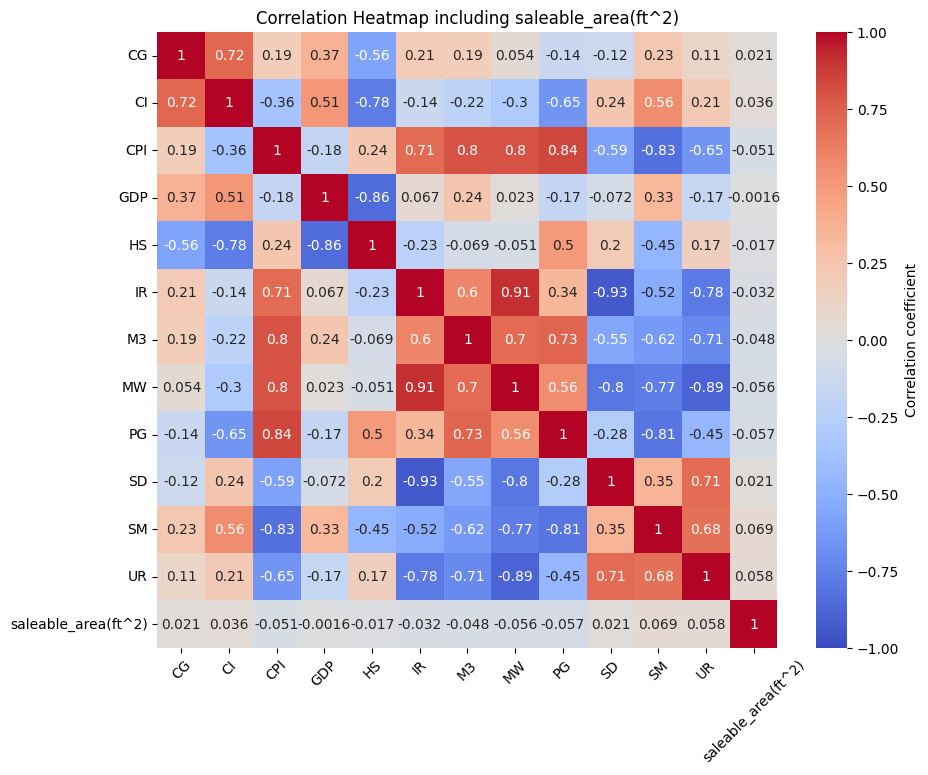

Correlation values with saleable_area(ft^2):
CG     0.021472
CI     0.035995
CPI   -0.050597
GDP   -0.001602
HS    -0.016803
IR    -0.032418
M3    -0.048045
MW    -0.056271
PG    -0.056773
SD     0.021450
SM     0.068971
UR     0.057677
Name: saleable_area(ft^2), dtype: float64



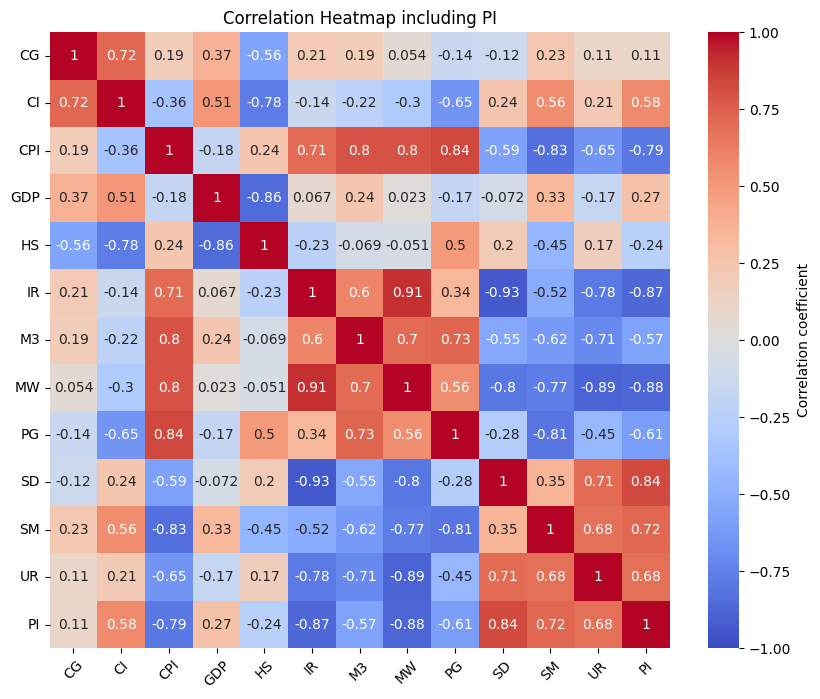

Correlation values with PI:
CG     0.106944
CI     0.578011
CPI   -0.792520
GDP    0.269706
HS    -0.243475
IR    -0.873264
M3    -0.571747
MW    -0.882602
PG    -0.608016
SD     0.835863
SM     0.719999
UR     0.682547
Name: PI, dtype: float64



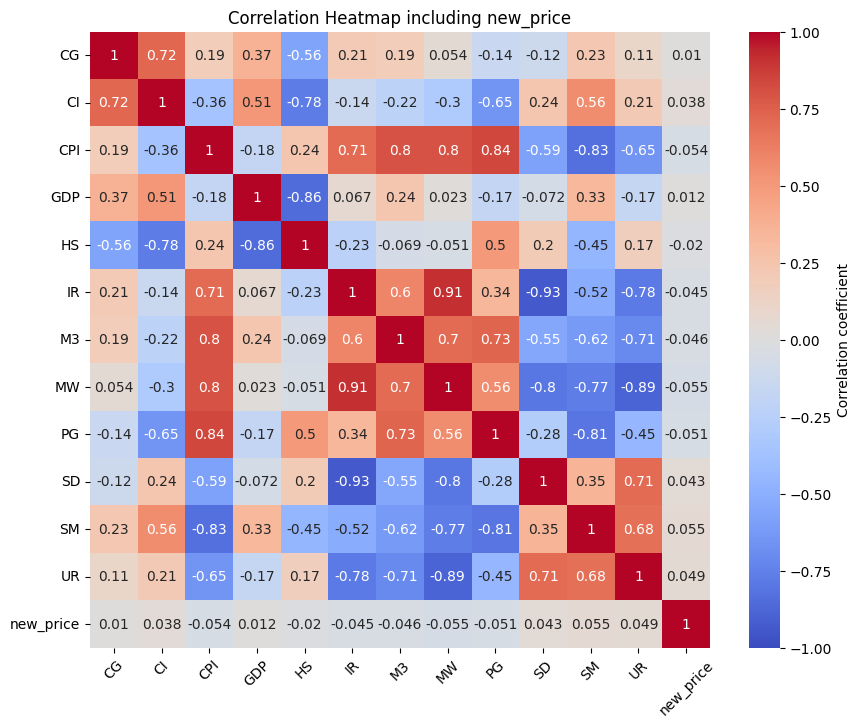

Correlation values with new_price:
CG     0.010464
CI     0.038465
CPI   -0.054064
GDP    0.012164
HS    -0.019984
IR    -0.044650
M3    -0.045557
MW    -0.055352
PG    -0.050614
SD     0.043136
SM     0.055231
UR     0.049236
Name: new_price, dtype: float64

     saleable_area(ft^2)        PI  new_price
CG              0.021472  0.106944   0.010464
CI              0.035995  0.578011   0.038465
CPI            -0.050597 -0.792520  -0.054064
GDP            -0.001602  0.269706   0.012164
HS             -0.016803 -0.243475  -0.019984
IR             -0.032418 -0.873264  -0.044650
M3             -0.048045 -0.571747  -0.045557
MW             -0.056271 -0.882602  -0.055352
PG             -0.056773 -0.608016  -0.050614
SD              0.021450  0.835863   0.043136
SM              0.068971  0.719999   0.055231
UR              0.057677  0.682547   0.049236


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_dataset is already loaded
# Example:
# merged_dataset = pd.read_csv('your_dataset.csv')

# List of columns to consider for correlation
columns_to_consider = ['CG', 'CI', 'CPI', 'GDP', 'HS', 'IR', 'M3', 'MW', 'PG', 'SD', 'SM', 'UR']

# List of target columns
targets = ['saleable_area(ft^2)', 'PI', 'new_price']

# Drop rows where the index is 'district', 'YearQuarter', or 'Quarter'
rows_to_drop = ['district', 'YearQuarter', 'Quarter']
filtered_dataset = merged_dataset[~merged_dataset.index.isin(rows_to_drop)]

# Loop through each target and calculate correlation, then create a heatmap
for target in targets:
    # Calculate correlation
    correlation = filtered_dataset[columns_to_consider + [target]].corr()

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'label': 'Correlation coefficient'})
    plt.title(f'Correlation Heatmap including {target}')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

    # Extract and display the correlation values for the target
    target_correlation = correlation[target].drop(target)
    print(f"Correlation values with {target}:\n{target_correlation}\n")

# Display the correlation table for all specified columns and targets
correlation_table = filtered_dataset[columns_to_consider + targets].corr().loc[columns_to_consider, targets]
print(correlation_table)

# District Price Analysis (Area Analysis)

My research indicates that an important factor governing the price of a flats in Hong Kong is its location or geographical area. Therefore, I have reviewed costs of flat in each area (or district) as well as the costs increases the area.

My research indicates that the price of a flat in Hong Kong is also governed by its location for geographical area. Therefore, I have reviewed costs of flat in each area as well as the costs increases the area.

The purpose of this is to look at which areas in Hong Kong would be best to purchase flats in the future.

In [ ]:
# Look at the average price for each district
# Double check and clean the data by removing rows with NaN values in the 'unit_rate' column
cleaned_dataset = merged_dataset.dropna(subset=['unit_rate'])  # Drop rows where 'unit_rate' is NaN

# Calculate the mean unit_rate for each district
# Identify the unique encoded districts
encoded_districts = cleaned_dataset['district_encoded'].unique()

# Calculate the average unit_rate for each encoded district
average_unit_rate = cleaned_dataset.groupby('district_encoded').agg({'unit_rate': 'mean'}).reset_index()

# Merge the average_unit_rate with the cleaned dataset (one-hot encoded columns)
result_dataset = average_unit_rate.merge(cleaned_dataset, on='district_encoded', how='left')

# Display the final table
print("Table of Districts with One-Hot Encoding and Average Unit Rate per Year:")
print(result_dataset)

Table of Districts with One-Hot Encoding and Average Unit Rate per Year:
        district_encoded   unit_rate_x  saleable_area(ft^2)  unit_rate_y  \
0                      1  18073.058350                  423        15792   
1                      1  18073.058350                 2190        34703   
2                      1  18073.058350                  761        15857   
3                      1  18073.058350                  320        13717   
4                      1  18073.058350                  519        16541   
...                  ...           ...                  ...          ...   
109883                18  16344.512547                  643        18146   
109884                18  16344.512547                  536        20056   
109885                18  16344.512547                  620        19081   
109886                18  16344.512547                  580        21207   
109887                18  16344.512547                  580        22155   

              

In [ ]:

# Step 1: Clean the data by removing rows with NaN values in the 'unit_rate' column
cleaned_dataset = merged_dataset.dropna(subset=['unit_rate'])  # Drop rows where 'unit_rate' is NaN

# Step 2: Calculate the mean unit_rate for each district
# Group by 'district_encoded' and 'district' and calculate the mean 'unit_rate'
average_unit_rate = cleaned_dataset.groupby(['district_encoded', 'district']).agg({'unit_rate': 'mean'}).reset_index()

# Rename the 'unit_rate' column to 'average_unit_rate' for clarity
average_unit_rate = average_unit_rate.rename(columns={'unit_rate': 'average_unit_rate'})

# Create a DataFrame with all district codes and descriptions
all_districts = merged_dataset[['district_encoded', 'district']].drop_duplicates().reset_index(drop=True)

# Merge the average unit rate with all districts to ensure all districts are included
final_table = pd.merge(all_districts, average_unit_rate, on=['district_encoded', 'district'], how='left')

# Fill NaN values in 'average_unit_rate' with a placeholder value (e.g., 0 or 'N/A')
final_table['average_unit_rate'] = final_table['average_unit_rate'].fillna('N/A')

# Step 3: Display the final table
print("Table of Districts with One-Hot Encoding, District, and Average Unit Rate per Year:")
print(final_table)

Table of Districts with One-Hot Encoding, District, and Average Unit Rate per Year:
    district_encoded                               district  average_unit_rate
0                  1          Kowloon Kowloon City District       18073.058350
1                  2             Kowloon Kwun Tong District       15462.839018
2                  3         Kowloon Yau Tsim Mong District       19410.405652
3                  4          Kowloon Wong Tai Sin District       16345.284921
4                  5          Kowloon Sham Shui Po District       16993.249811
5                  6  New Territories East Sha Tin District       15757.109088
6                  7  New Territories East Long Ping Estate       16238.593147
7                  8    New Territories East North District       15060.452633
8                  9   New Territories East Tai Po District       14851.438245
9                 10                    Kwai Tsing District       13972.931690
10                11                     Tsuen 

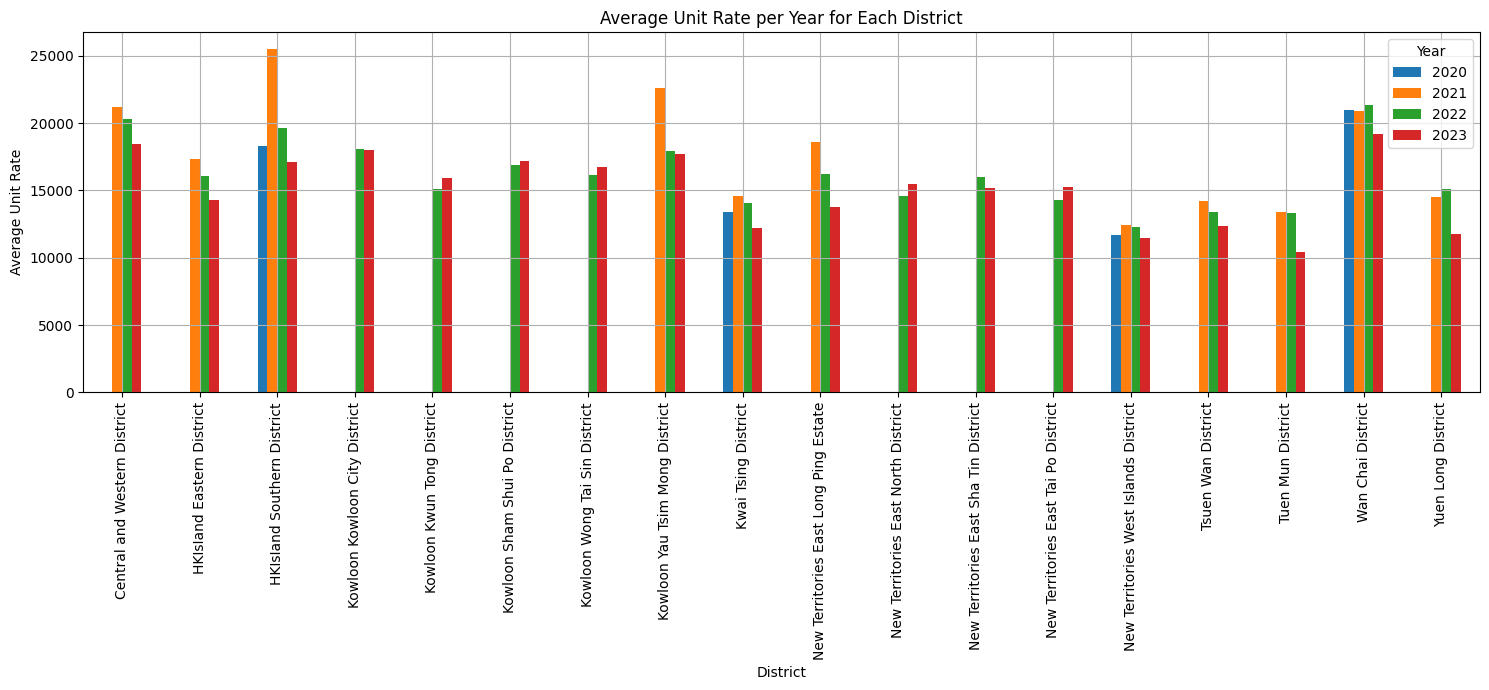

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the year from the 'YearQuarter' column
merged_dataset['year'] = merged_dataset['YearQuarter'].str[:4].astype(int)

# Calculate the mean unit_rate for each district per year
average_unit_rate_per_year = merged_dataset.groupby(['district_encoded', 'district', 'year'])['unit_rate'].mean().reset_index()

# Create a pivot table to ensure all combinations of district and year are included
pivot_table = average_unit_rate_per_year.pivot(index='district', columns='year', values='unit_rate')

# Fill missing values with 0 or any other placeholder, if necessary
pivot_table = pivot_table.fillna(0)

# Plot the data
pivot_table.plot(kind='bar', figsize=(15, 7))
plt.xlabel('District')
plt.ylabel('Average Unit Rate')
plt.title('Average Unit Rate per Year for Each District')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()  # Adjust plot to fit labels
plt.show()

The bar chart illustrates average unit rates per year for each district from 2020 to 2023, with bars colored by year (blue for 2020, orange for 2021, green for 2022, red for 2023). There are significant yearly variations in unit rates across districts, with consistent trends observed in districts like `Central and Western` and `Wan Chai`. Notable differences exist among districts, with `Wan Chai` consistently showing high rates. Some districts lack data for certain years, indicating incomplete datasets. Recommendations include addressing missing data, investigating districts with significant fluctuations, and further analyzing high variability districts like `Wan Chai` to understand contributing factors.

<ipython-input-55-bda636191e67>:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(years))


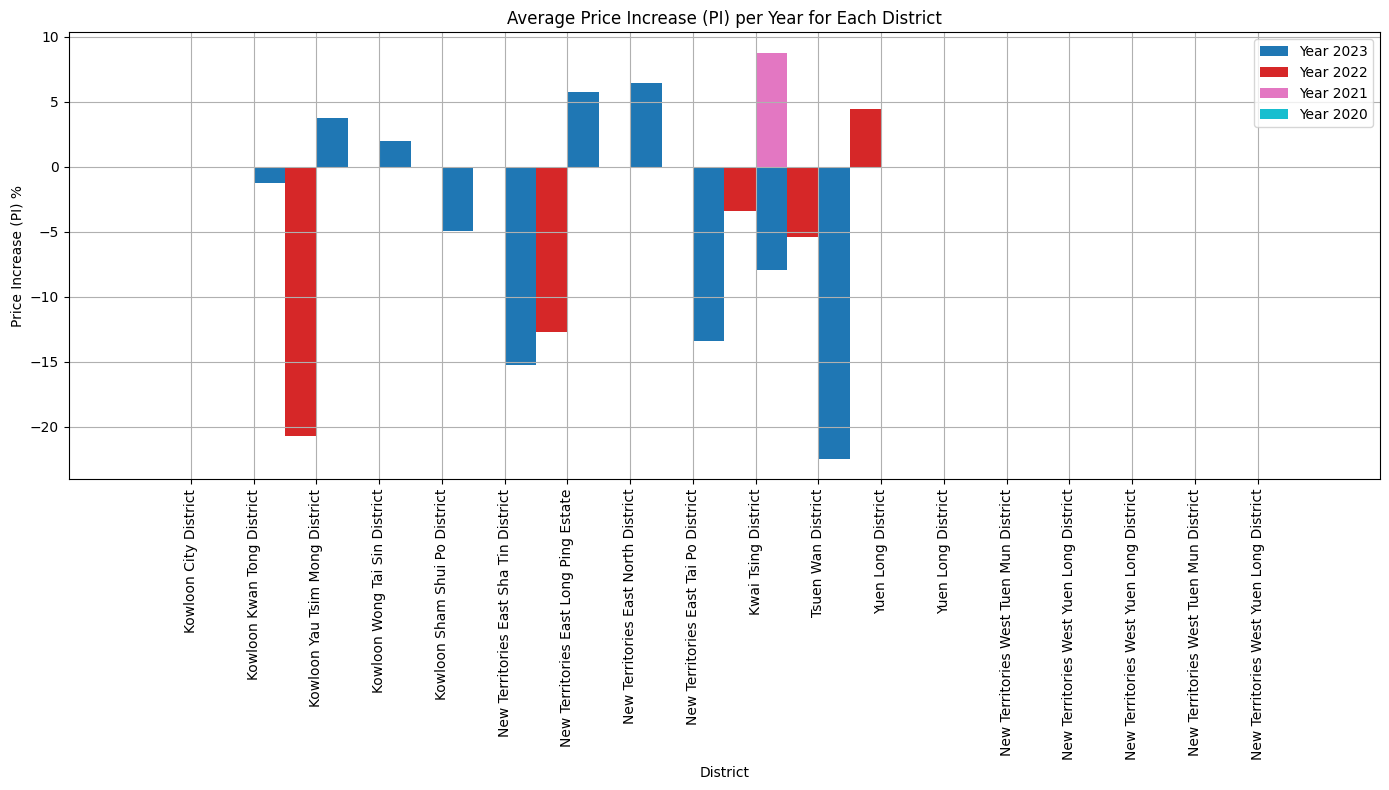

In [ ]:

#Extract the year from the 'YearQuarter' column
merged_dataset['year'] = merged_dataset['YearQuarter'].str[:4].astype(int)

# Calculate the mean unit_rate for each district per year
# Group by 'district_encoded', 'district', and 'year' and calculate the mean 'unit_rate'
average_unit_rate_per_year = cleaned_dataset.groupby(['district_encoded', 'district', 'year']).agg({'unit_rate': 'mean'}).reset_index()

# Rename the 'unit_rate' column to 'average_unit_rate' for clarity
average_unit_rate_per_year = average_unit_rate_per_year.rename(columns={'unit_rate': 'average_unit_rate'})

# Calculate the Price Increase (PI) for each year and district
# Sort the data by district and year
average_unit_rate_per_year = average_unit_rate_per_year.sort_values(by=['district_encoded', 'year'])

# Calculate the year-over-year price increase
average_unit_rate_per_year['PI'] = average_unit_rate_per_year.groupby('district_encoded')['average_unit_rate'].pct_change() * 100

# Fill NaN values in 'PI' with 0 (or another appropriate value)
average_unit_rate_per_year['PI'] = average_unit_rate_per_year['PI'].fillna(0)

# Manually define all possible districts with their encodings
all_districts = pd.DataFrame({
    'district_encoded': range(1, 19),
    'district': [
        'Kowloon City District', 'Kowloon Kwan Tong District', 'Kowloon Yau Tsim Mong District',
        'Kowloon Wong Tai Sin District', 'Kowloon Sham Shui Po District', 'New Territories East Sha Tin District',
        'New Territories East Long Ping Estate', 'New Territories East North District', 'New Territories East Tai Po District',
        'Kwai Tsing District', 'Tsuen Wan District', 'Yuen Long District', 'Yuen Long District',
        'New Territories West Tuen Mun District', 'New Territories West Yuen Long District',
        'New Territories West Yuen Long District', 'New Territories West Tuen Mun District', 'New Territories West Yuen Long District'
        # Add the remaining district names here if any
    ]
})

# Create a DataFrame with all possible combinations of districts and years
years = merged_dataset['year'].unique()
all_combinations = pd.MultiIndex.from_product([all_districts['district_encoded'], years], names=['district_encoded', 'year']).to_frame(index=False)
all_district_year_combinations = pd.merge(all_combinations, all_districts, on='district_encoded')

# Merge the PI with all district-year combinations to ensure all are included
final_table = pd.merge(all_district_year_combinations, average_unit_rate_per_year, on=['district_encoded', 'district', 'year'], how='left')

# Fill NaN values in 'PI' with a placeholder value (e.g., 0 or 'N/A')
final_table['PI'] = final_table['PI'].fillna(0)

# Step 5: Plot the data as a bar graph
plt.figure(figsize=(14, 8))

# Generate a color map with distinct colors
colors = plt.cm.get_cmap('tab10', len(years))

# Increase the bar width
bar_width = 0.5

# Positions of the bars on the x-axis
r = np.arange(len(all_districts))

# Loop through each year and plot
for i, year in enumerate(years):
    data_for_year = final_table[final_table['year'] == year]
    plt.bar(r + i * bar_width, data_for_year['PI'], width=bar_width, label=f'Year {year}', color=colors(i))

# Set district names as x-ticks
plt.xticks(ticks=r + bar_width * (len(years) - 1) / 2, labels=all_districts['district'], rotation=90)

# Labels and title
plt.xlabel('District')
plt.ylabel('Price Increase (PI) %')
plt.title('Average Price Increase (PI) per Year for Each District')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust plot to fit labels
plt.show()

# Note: no data from some districts and some years

# Decision Tree

In [62]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109888 entries, 7 to 159675
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   saleable_area(ft^2)  109888 non-null  int64  
 1   unit_rate            109888 non-null  int64  
 2   district             109888 non-null  object 
 3   YearQuarter          109888 non-null  object 
 4   CG                   109888 non-null  float64
 5   CI                   109888 non-null  float64
 6   CPI                  109888 non-null  float64
 7   GDP                  109888 non-null  float64
 8   HS                   109888 non-null  float64
 9   IR                   109888 non-null  float64
 10  M3                   109888 non-null  float64
 11  MW                   109888 non-null  float64
 12  PG                   109888 non-null  float64
 13  PI                   109888 non-null  float64
 14  SD                   109888 non-null  float64
 15  SM                   1

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the feature matrix (X) and target variables (y)
features = merged_dataset.drop(columns=['unit_rate', 'new_price', 'PI', 'district', 'YearQuarter', 'Quarter'])
target_variables = ['unit_rate', 'new_price', 'PI']

# Function to train and evaluate a decision tree model
def train_and_evaluate_decision_tree(X, y, target_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Decision Tree Regressor
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Results for target variable '{target_name}':")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}\n")

# Iterate through each target variable and train a Decision Tree model
for target in target_variables:
    y = merged_dataset[target]
    train_and_evaluate_decision_tree(features, y, target)

Results for target variable 'unit_rate':
Mean Squared Error (MSE): 27058246.20801477
R-squared (R2): 0.4800727950074529

Results for target variable 'new_price':
Mean Squared Error (MSE): 42046979251457.72
R-squared (R2): 0.8980140437585132

Results for target variable 'PI':
Mean Squared Error (MSE): 1.0876617968427731e-24
R-squared (R2): 1.0



The Decision Tree Regressor was evaluated for `unit_rate`, `new_price`, and `PI`. The model explains 48% of the variance in `unit_rate` (R² = 0.48) with a high error rate, suggesting room for improvement through feature engineering and model tuning. For `new_price`, the model performs well (R² = 0.898), but further validation is recommended. The perfect score for `PI` (R² = 1.0) indicates possible overfitting, warranting investigation. General recommendations include using cross-validation, exploring different models, and hyperparameter tuning to enhance performance and ensure robust predictions.

# Regression Analysis

In [64]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109888 entries, 7 to 159675
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   saleable_area(ft^2)  109888 non-null  int64  
 1   unit_rate            109888 non-null  int64  
 2   district             109888 non-null  object 
 3   YearQuarter          109888 non-null  object 
 4   CG                   109888 non-null  float64
 5   CI                   109888 non-null  float64
 6   CPI                  109888 non-null  float64
 7   GDP                  109888 non-null  float64
 8   HS                   109888 non-null  float64
 9   IR                   109888 non-null  float64
 10  M3                   109888 non-null  float64
 11  MW                   109888 non-null  float64
 12  PG                   109888 non-null  float64
 13  PI                   109888 non-null  float64
 14  SD                   109888 non-null  float64
 15  SM                   1

Regression Analysis for unit_rate:
                            OLS Regression Results                            
Dep. Variable:              unit_rate   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     5268.
Date:                Wed, 24 Jul 2024   Prob (F-statistic):               0.00
Time:                        07:29:34   Log-Likelihood:            -7.6421e+05
No. Observations:               76921   AIC:                         1.528e+06
Df Residuals:                   76905   BIC:                         1.529e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

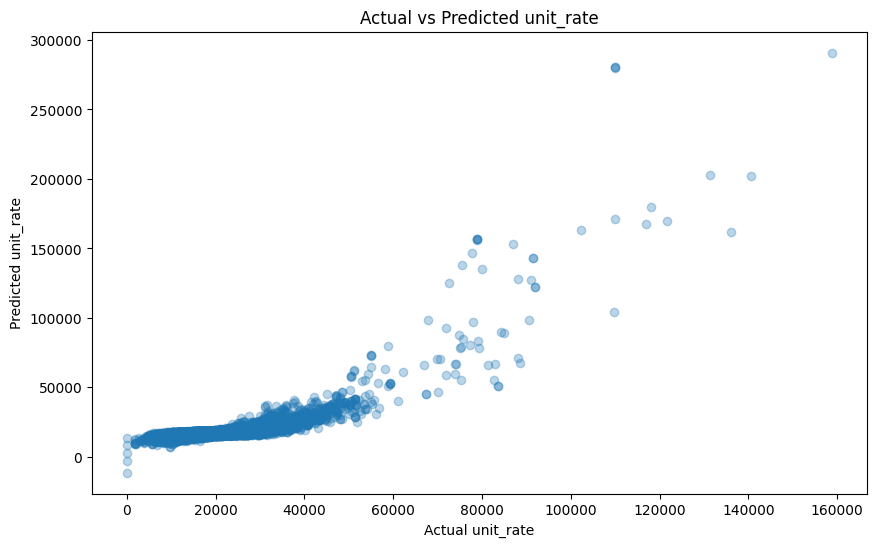

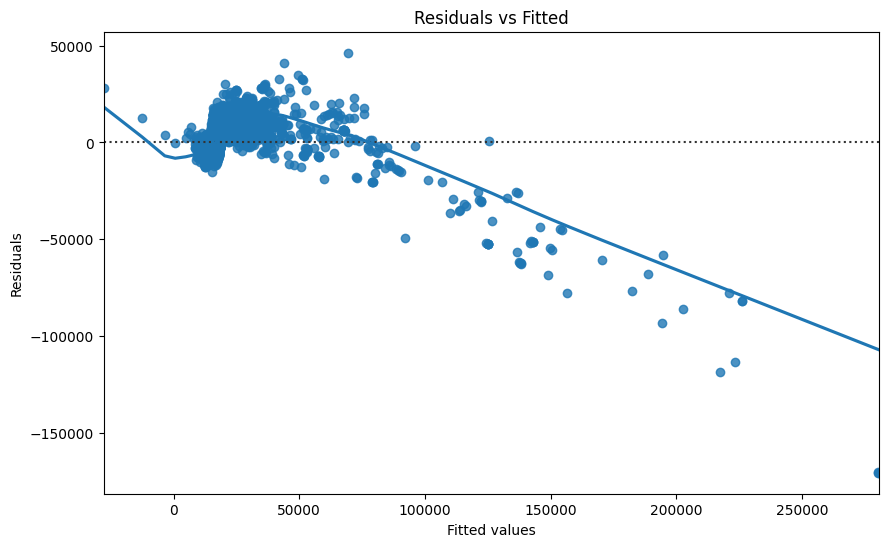

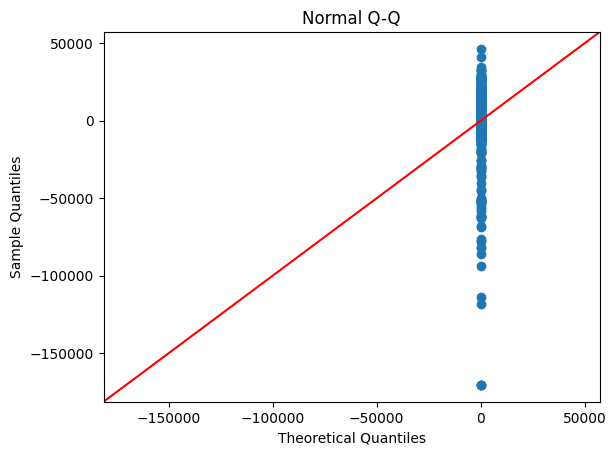

Regression Analysis for PI:
                            OLS Regression Results                            
Dep. Variable:                     PI   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.876e+07
Date:                Wed, 24 Jul 2024   Prob (F-statistic):               0.00
Time:                        07:32:53   Log-Likelihood:                 65693.
No. Observations:               76921   AIC:                        -1.314e+05
Df Residuals:                   76905   BIC:                        -1.312e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const 

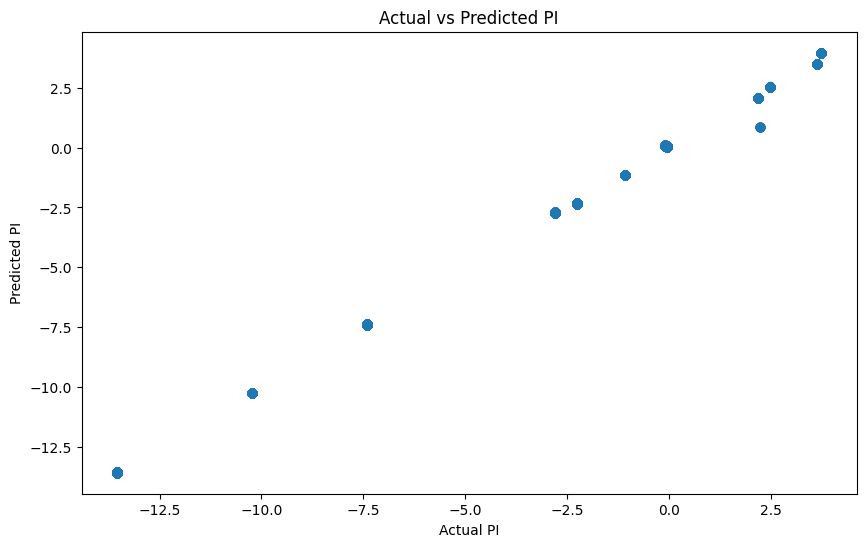

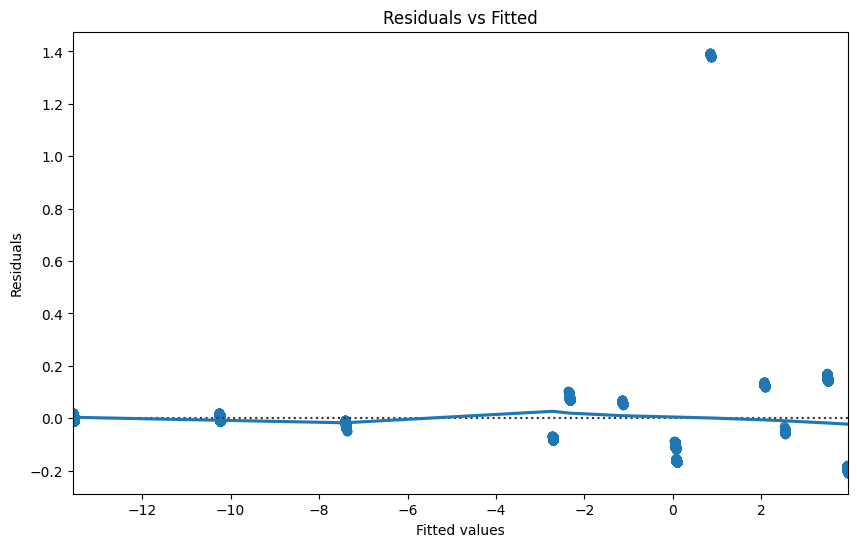

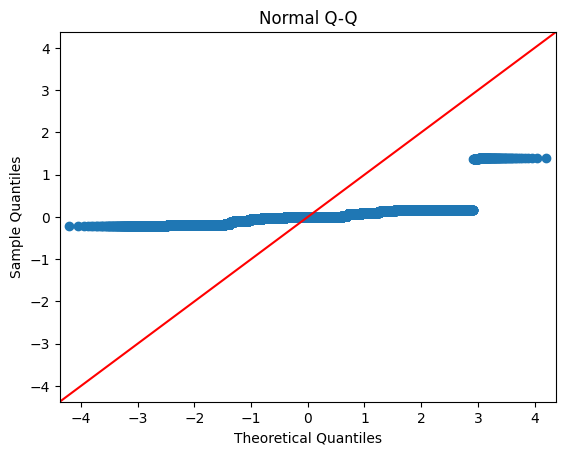

Regression Analysis for new_price:
                            OLS Regression Results                            
Dep. Variable:              new_price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                 1.655e+04
Date:                Wed, 24 Jul 2024   Prob (F-statistic):               0.00
Time:                        07:36:15   Log-Likelihood:            -1.3383e+06
No. Observations:               76921   AIC:                         2.677e+06
Df Residuals:                   76905   BIC:                         2.677e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

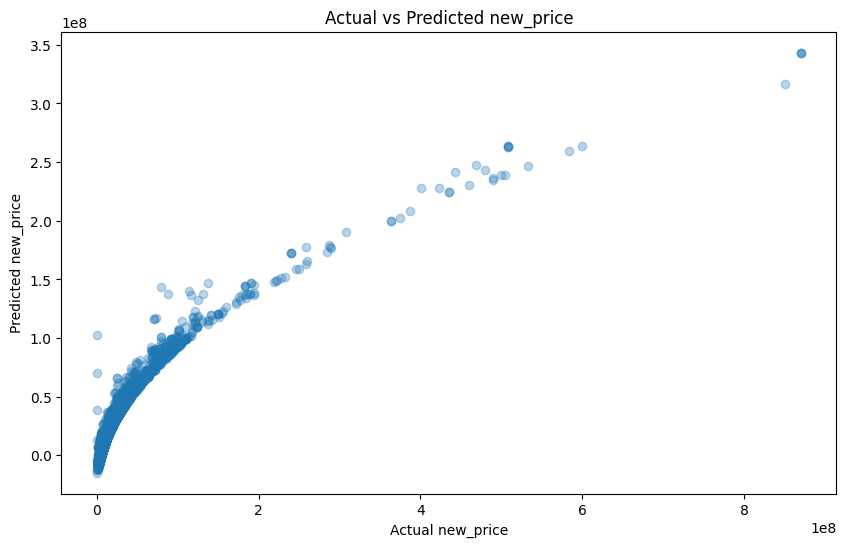

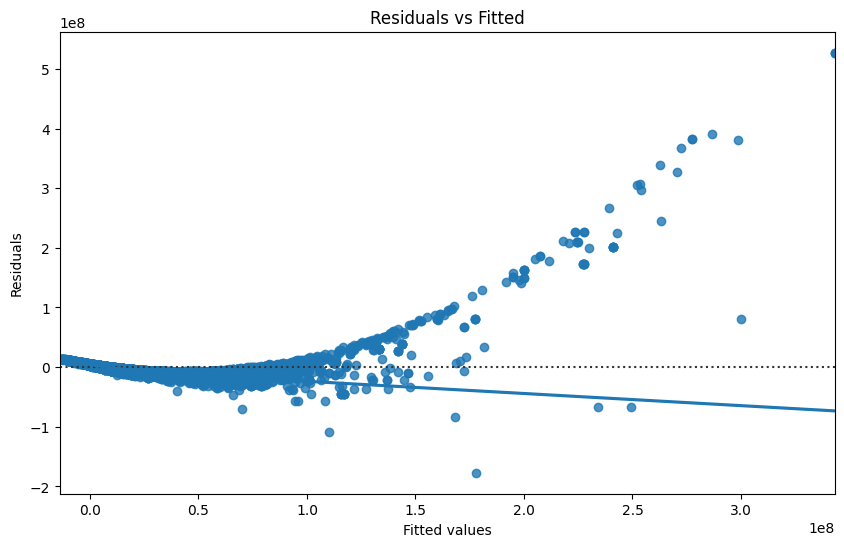

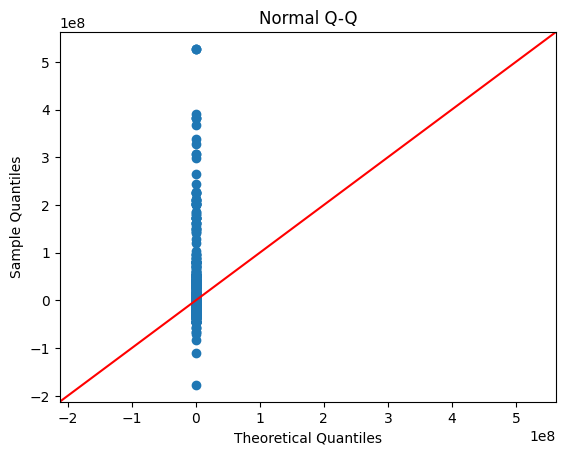

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# List of target columns
targets = ['unit_rate', 'PI', 'new_price']

# Function to perform regression analysis
def perform_regression_analysis(target):
    # Define independent variables (X) and dependent variable (y)
    X = merged_dataset.drop(columns=[target, 'district', 'YearQuarter', 'Quarter'])  # drop target and objects
    y = merged_dataset[target]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Perform Regression Analysis
    # Add a constant term to the independent variables
    X_train_const = sm.add_constant(X_train)

    # Fit the regression model
    model = sm.OLS(y_train, X_train_const).fit()

    # Print the summary of the regression analysis
    print(f"Regression Analysis for {target}:")
    print(model.summary())

    # Visualize the Results
    # Predicted vs Actual
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, model.predict(sm.add_constant(X_test)), alpha=0.3)
    plt.xlabel(f'Actual {target}')
    plt.ylabel(f'Predicted {target}')
    plt.title(f'Actual vs Predicted {target}')
    plt.show()

    # Residuals plot
    plt.figure(figsize=(10, 6))
    sns.residplot(x=model.predict(sm.add_constant(X_train)), y=y_train, lowess=True)
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Fitted')
    plt.show()

    # QQ plot
    sm.qqplot(model.resid, line='45')
    plt.title('Normal Q-Q')
    plt.show()

# Perform regression analysis for each target
for target in targets:
    perform_regression_analysis(target)

The regression analysis shows:
- **`unit_rate`**: Moderate fit (R² = 0.507). Significant predictors include `saleable_area(ft²)`, `CG`, `HS`, `IR`, `UR`, `new_price`, `district_encoded`, and `year`.
- **`PI`**: Near-perfect fit (R² = 1.000), indicating potential overfitting. Most predictors are significant, with `unit_rate` having a negative impact.
- **`new_price`**: Strong fit (R² = 0.764). Significant predictors are `saleable_area(ft²)`, `unit_rate`, and `year`.

Address overfitting in `PI` by simplifying the model. Improve `unit_rate` model by exploring additional predictors. Validate `new_price` model further with cross-validation.

# MultiCollinearity Issue

In my property data there is a strong correlation between unit rate, saleable area and price in that if you have two variables you can derive the third variable does this cause a problem in the machine learning

In [67]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your dataframe is merged_database and target variable is 'new_price'
X = merged_dataset[['unit_rate', 'saleable_area(ft^2)']]
y = merged_dataset['new_price']

# Calculate VIF to check multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

# If VIF is high, consider transformations or regularization

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)

# Evaluate Ridge Regression model
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print(f'Ridge MSE: {ridge_mse}')
print(f'Ridge R2: {ridge_r2}')

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)

# Evaluate Lasso Regression model
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print(f'Lasso MSE: {lasso_mse}')
print(f'Lasso R2: {lasso_r2}')

               feature       VIF
0            unit_rate  3.733444
1  saleable_area(ft^2)  3.733444
Ridge MSE: 111441094802430.25
Ridge R2: 0.7296969527809778
Lasso MSE: 111441094800492.14
Lasso R2: 0.7296969527856787


The results show the VIF values for `unit_rate` and `saleable_area(ft²)` are both 3.733444, indicating moderate multicollinearity. Ridge and Lasso regression models were applied, both yielding identical R² values of approximately 0.73, suggesting that they explain 73% of the variance in the target variable. The MSE for both models is similar, around 11144190482034. These high MSE values likely reflect the large scale of the target variable. The similar performance of Ridge and Lasso suggests both are effective, but further fine-tuning might be needed to optimize the models and address multicollinearity more effectively.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample dataset, replace with your actual data
# merged_dataset = pd.read_csv('your_dataset.csv')

# Example data preparation (use your actual dataset)
X = merged_dataset[['unit_rate', 'CG', 'CI', 'CPI', 'GDP', 'HS', 'IR', 'M3', 'MW', 'PG', 'PI', 'SD', 'UR', 'new_price']]
y_unit_rate = merged_dataset['unit_rate']  # Replace 'unit_rate' with your actual target variable
y_new_price = merged_dataset['new_price']  # Replace 'new_price' with your actual target variable
y_PI = merged_dataset['PI']  # Replace 'PI' with your actual target variable

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
n_components = min(X.shape[0], X.shape[1])  # Ensure n_components is within valid range
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Function to train and evaluate models
def train_and_evaluate_model(X, y, model_name):
    # Split the PCA-transformed data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Ridge Regression on PCA-transformed data
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, y_train)
    ridge_predictions = ridge.predict(X_test)
    ridge_mse = mean_squared_error(y_test, ridge_predictions)
    ridge_r2 = r2_score(y_test, ridge_predictions)
    print(f'Ridge MSE (PCA) for {model_name}: {ridge_mse}')
    print(f'Ridge R2 (PCA) for {model_name}: {ridge_r2}')

    # Lasso Regression on PCA-transformed data
    lasso = Lasso(alpha=0.1)
    lasso.fit(X_train, y_train)
    lasso_predictions = lasso.predict(X_test)
    lasso_mse = mean_squared_error(y_test, lasso_predictions)
    lasso_r2 = r2_score(y_test, lasso_predictions)
    print(f'Lasso MSE (PCA) for {model_name}: {lasso_mse}')
    print(f'Lasso R2 (PCA) for {model_name}: {lasso_r2}')

# Train and evaluate models for each target variable
train_and_evaluate_model(X_pca, y_unit_rate, 'unit_rate')
train_and_evaluate_model(X_pca, y_new_price, 'new_price')
train_and_evaluate_model(X_pca, y_PI, 'PI')

Ridge MSE (PCA) for unit_rate: 0.012811429851018713
Ridge R2 (PCA) for unit_rate: 0.9999999997538269
Lasso MSE (PCA) for unit_rate: 1.522656879859841
Lasso R2 (PCA) for unit_rate: 0.999999970741979
Ridge MSE (PCA) for new_price: 108301.54986861501
Ridge R2 (PCA) for new_price: 0.999999999737312
Lasso MSE (PCA) for new_price: 83.51319654525963
Lasso R2 (PCA) for new_price: 0.9999999999997974
Ridge MSE (PCA) for PI: 1.391150708373768e-05
Ridge R2 (PCA) for PI: 0.9999996402586183
Lasso MSE (PCA) for PI: 0.4196352909912215
Lasso R2 (PCA) for PI: 0.989148538797894


The regression results show exceptionally high R² values (close to 1) for both Ridge and Lasso models across all target variables (`unit_rate`, `new_price`, `PI`), indicating near-perfect fits. Ridge regression has lower MSE for `unit_rate` and `PI`, while Lasso performs better for `new_price`. The high R² values suggest possible overfitting, especially with PCA transformation. Ridge generally performs very well, particularly for `PI`, whereas Lasso excels in predicting `new_price`. Both models are highly effective but further validation is needed to ensure robustness and to address potential overfitting.

# XGBoost

XGBoost (Extreme Gradient Boosting) machine learning algorithm based on gradient boosting, designed for speed and performance. It builds an ensemble of decision trees sequentially, where each tree corrects errors from the previous ones. Key features include regularization to prevent overfitting, handling missing values, and parallel processing for faster computation. XGBoost supports regression, classification, and ranking tasks, and is known for its scalability and accuracy. It is widely used in competitive machine learning and real-world applications due to its robust performance and flexibility.

In [76]:
pip install xgboost

In [77]:
import xgboost as xgb

In [78]:

# List of dependent variables
dependent_vars = ['new_price', 'PI', 'unit_rate']

# Iterate over each dependent variable
for dep_var in dependent_vars:
    print(f'\nTraining model for {dep_var}...\n')

    # Define the features and the target variable
    X = merged_dataset.drop(columns=[dep_var, 'district', 'YearQuarter', 'Quarter'])
    y = merged_dataset[dep_var]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create the DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Set the parameters for XGBoost
    params = {
        'objective': 'reg:squarederror',
        'max_depth': 6,
        'eta': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'eval_metric': 'rmse'
    }

    # Train the XGBoost model
    model = xgb.train(params, dtrain, num_boost_round=100)

    # Make predictions
    y_pred = model.predict(dtest)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error for {dep_var}: {mse}')
    print(f'R-squared for {dep_var}: {r2}')


Training model for new_price...

Mean Squared Error for new_price: 75510874889977.83
R-squared for new_price: 0.8168465625977478

Training model for PI...

Mean Squared Error for PI: 2.748638179922275e-08
R-squared for PI: 0.9999999992892223

Training model for unit_rate...

Mean Squared Error for unit_rate: 2028746.3366038983
R-squared for unit_rate: 0.9610174139033114


The XGBoost model results show high R-squared values for all targets: `new_price` (0.818), `PI` (0.9999999993), and `unit_rate` (0.961). This indicates strong performance, especially for `PI` and `unit_rate`. However, the Mean Squared Error (MSE) for `new_price` is very high (75510874889977.83), suggesting significant prediction errors, likely due to the scale of the target variable. The extremely low MSE for `PI` (2.748638179922275e-08) suggests nearly perfect predictions, which might indicate overfitting. Overall, while the model performs well, particularly for `PI`, further validation is needed to ensure robustness and address potential overfitting.


Training model for new_price...



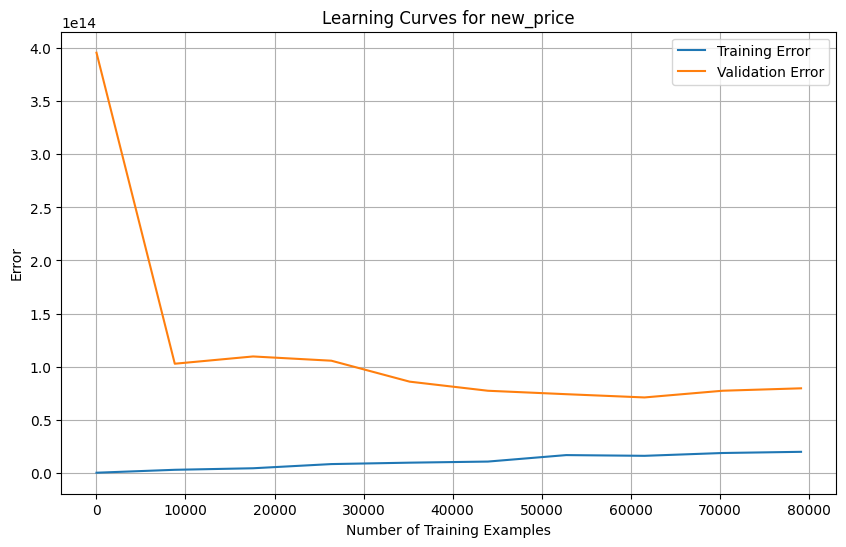


Training model for PI...



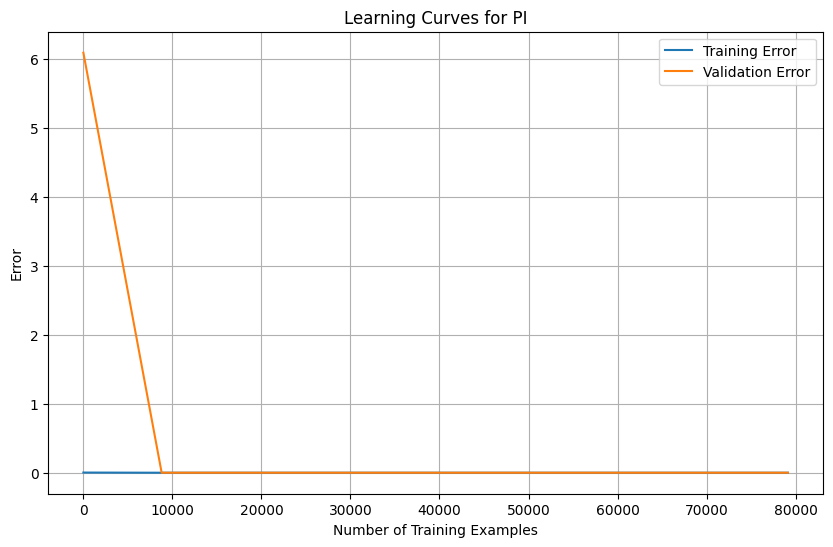


Training model for unit_rate...



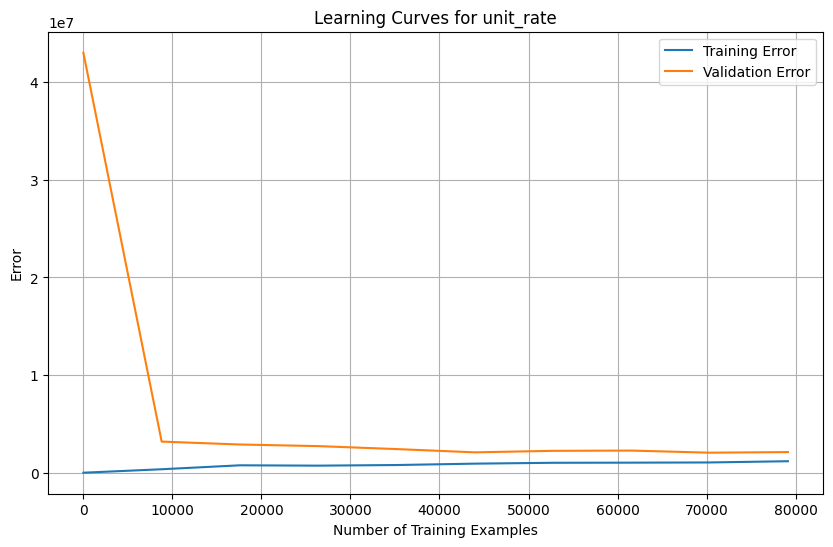

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Sample dataset, replace with your actual data
# merged_dataset = pd.read_csv('your_dataset.csv')

# List of dependent variables
dependent_vars = ['new_price', 'PI', 'unit_rate']

# Function to plot learning curves
def plot_learning_curves(train_sizes, train_errors, test_errors, dep_var):
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_errors, label='Training Error')
    plt.plot(train_sizes, test_errors, label='Validation Error')
    plt.title(f'Learning Curves for {dep_var}')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

# Iterate over each dependent variable
for dep_var in dependent_vars:
    print(f'\nTraining model for {dep_var}...\n')

    # Define the features and the target variable
    X = merged_dataset.drop(columns=[dep_var, 'district', 'YearQuarter', 'Quarter'])
    y = merged_dataset[dep_var]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create the DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Set the parameters for XGBoost
    params = {
        'objective': 'reg:squarederror',
        'max_depth': 6,
        'eta': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'eval_metric': 'rmse'
    }

    # Prepare to collect training and validation errors
    train_sizes = []
    train_errors = []
    test_errors = []

    # Train the XGBoost model with different training sizes
    num_boost_round = 100
    for i in range(10, len(X_train), int(len(X_train) / 10)):
        # Sample the training data
        X_train_sample = X_train[:i]
        y_train_sample = y_train[:i]

        dtrain_sample = xgb.DMatrix(X_train_sample, label=y_train_sample)

        # Train the model
        model = xgb.train(params, dtrain_sample, num_boost_round)

        # Predictions on training and test sets
        y_train_pred = model.predict(dtrain_sample)
        y_test_pred = model.predict(dtest)

        # Calculate errors
        train_error = mean_squared_error(y_train_sample, y_train_pred)
        test_error = mean_squared_error(y_test, y_test_pred)

        # Store the errors
        train_sizes.append(i)
        train_errors.append(train_error)
        test_errors.append(test_error)

    # Plot learning curves
    plot_learning_curves(train_sizes, train_errors, test_errors, dep_var)

The learning curves indicate overfitting for `new_price` and `PI`. The `new_price` curve shows a low training error and a high validation error that decreases slowly, suggesting the model fits the training data well but performs poorly on validation data. For `PI`, both errors quickly drop to near zero, indicating a near-perfect fit, which might signal overfitting. The `unit_rate` curve shows a low training error and a higher but stable validation error, indicating better generalization with slight overfitting. Overall, models for `new_price` and `PI` need further tuning to improve their generalization and reduce overfitting.


Training model for new_price...

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters for new_price: {'alpha': 0, 'colsample_bytree': 0.8, 'eta': 0.1, 'lambda': 0, 'max_depth': 5, 'subsample': 1}
[0]	train-rmse:16875755.02195	eval-rmse:19222367.00841
[1]	train-rmse:15879158.22895	eval-rmse:18292741.98241
[2]	train-rmse:14529424.85146	eval-rmse:16914565.62878
[3]	train-rmse:13329259.77434	eval-rmse:15734069.94172
[4]	train-rmse:12267548.25655	eval-rmse:14652939.51668
[5]	train-rmse:11336907.68662	eval-rmse:13726326.84714
[6]	train-rmse:10511029.02006	eval-rmse:12923104.67201
[7]	train-rmse:10045369.47697	eval-rmse:12511306.47973
[8]	train-rmse:9662401.05737	eval-rmse:12154763.80287
[9]	train-rmse:9049108.00281	eval-rmse:11555640.86749
[10]	train-rmse:8752743.06927	eval-rmse:11310094.36404
[11]	train-rmse:8273210.71101	eval-rmse:10952442.46250
[12]	train-rmse:7818367.95836	eval-rmse:10558039.35043
[13]	train-rmse:7635232.43068	eval-rmse:10393160.60915
[14]	tra

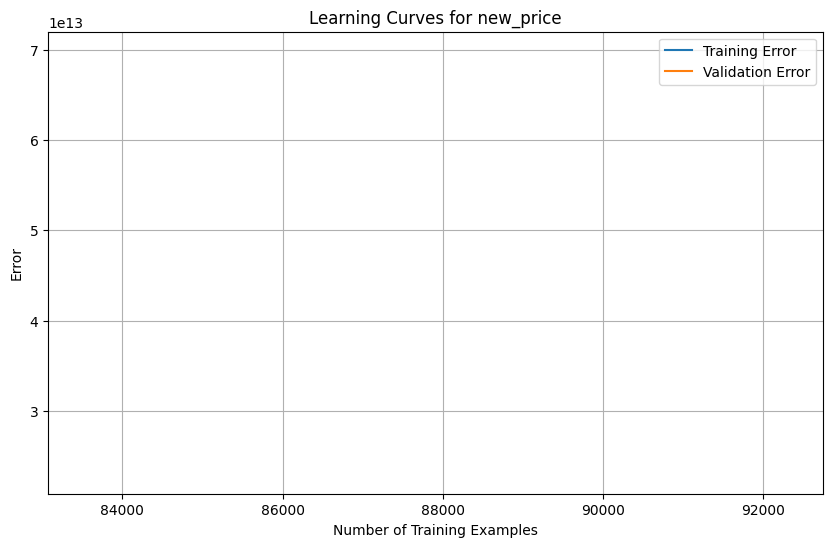

Mean Squared Error for new_price: 69698166667085.89
R-squared for new_price: 0.8309454257507729

Training model for PI...

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters for PI: {'alpha': 0, 'colsample_bytree': 0.9, 'eta': 0.3, 'lambda': 1, 'max_depth': 5, 'subsample': 1}
[0]	train-rmse:4.36046	eval-rmse:4.35378
[1]	train-rmse:3.05252	eval-rmse:3.04791
[2]	train-rmse:2.13691	eval-rmse:2.13367
[3]	train-rmse:1.49594	eval-rmse:1.49367
[4]	train-rmse:1.04722	eval-rmse:1.04564
[5]	train-rmse:0.73311	eval-rmse:0.73199
[6]	train-rmse:0.51321	eval-rmse:0.51243
[7]	train-rmse:0.35927	eval-rmse:0.35872
[8]	train-rmse:0.25151	eval-rmse:0.25112
[9]	train-rmse:0.17607	eval-rmse:0.17580
[10]	train-rmse:0.12325	eval-rmse:0.12307
[11]	train-rmse:0.08628	eval-rmse:0.08615
[12]	train-rmse:0.06041	eval-rmse:0.06031
[13]	train-rmse:0.04229	eval-rmse:0.04222
[14]	train-rmse:0.02961	eval-rmse:0.02956
[15]	train-rmse:0.02073	eval-rmse:0.02069
[16]	train-rmse:0.01451	eval-rms

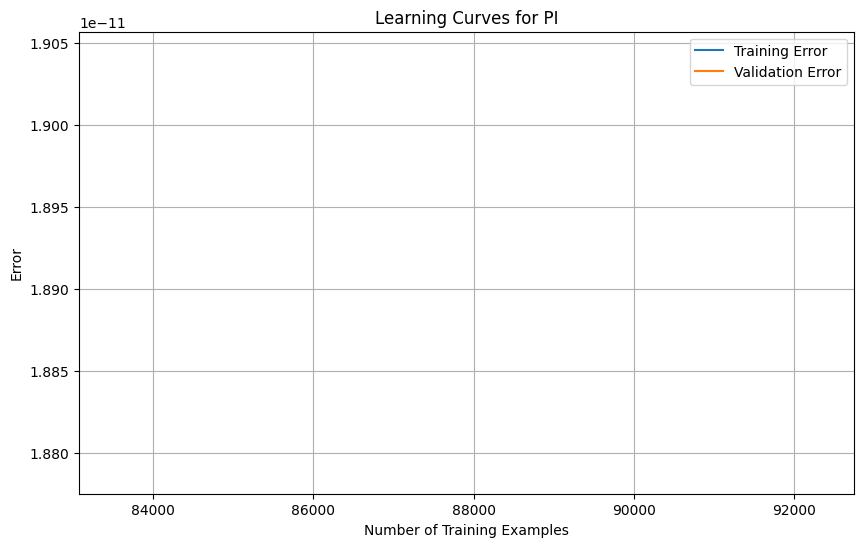

Mean Squared Error for PI: 1.878766068976597e-11
R-squared for PI: 0.9999999999995142

Training model for unit_rate...

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters for unit_rate: {'alpha': 0, 'colsample_bytree': 1, 'eta': 0.3, 'lambda': 0, 'max_depth': 5, 'subsample': 1}
[0]	train-rmse:5390.90733	eval-rmse:5471.36839
[1]	train-rmse:4159.53259	eval-rmse:4229.44276
[2]	train-rmse:3295.64170	eval-rmse:3375.61581
[3]	train-rmse:2672.33881	eval-rmse:2774.95492
[4]	train-rmse:2258.01635	eval-rmse:2389.20377
[5]	train-rmse:1954.51713	eval-rmse:2109.58190
[6]	train-rmse:1738.57628	eval-rmse:1917.49677
[7]	train-rmse:1595.15339	eval-rmse:1791.49293
[8]	train-rmse:1505.50682	eval-rmse:1709.84135
[9]	train-rmse:1449.77489	eval-rmse:1659.27203
[10]	train-rmse:1415.92900	eval-rmse:1629.89901
[11]	train-rmse:1393.95074	eval-rmse:1611.32910
[12]	train-rmse:1354.74945	eval-rmse:1588.43870
[13]	train-rmse:1338.53406	eval-rmse:1575.99617
[14]	train-rmse:1310.25045	eva

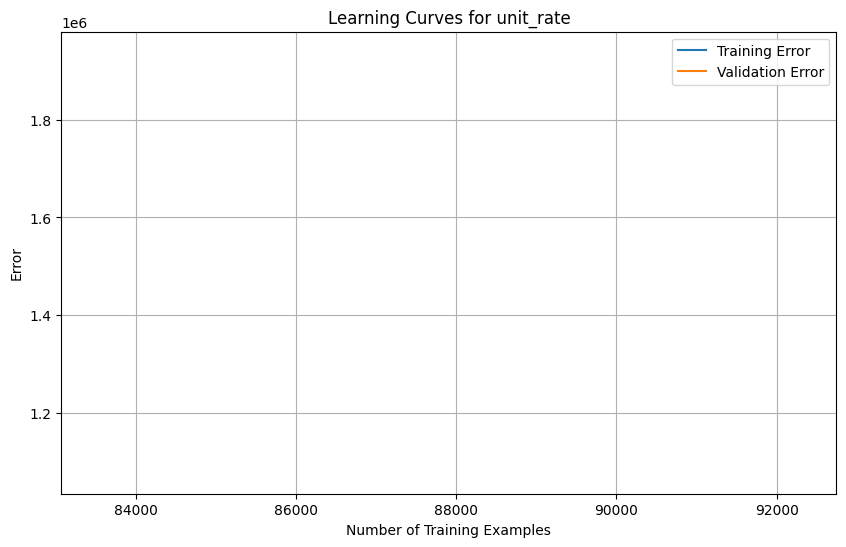

Mean Squared Error for unit_rate: 1936958.0300509245
R-squared for unit_rate: 0.9627811364044006


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# List of dependent variables
dependent_vars = ['new_price', 'PI', 'unit_rate']

# Function to plot learning curves
def plot_learning_curves(train_sizes, train_errors, test_errors, dep_var):
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_errors, label='Training Error')
    plt.plot(train_sizes, test_errors, label='Validation Error')
    plt.title(f'Learning Curves for {dep_var}')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

# Iterate over each dependent variable
for dep_var in dependent_vars:
    print(f'\nTraining model for {dep_var}...\n')

    # Define the features and the target variable
    X = merged_dataset.drop(columns=[dep_var, 'district', 'YearQuarter', 'Quarter'])
    y = merged_dataset[dep_var]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create the DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Hyperparameter tuning using GridSearchCV
    param_grid = {
        'max_depth': [3, 4, 5],
        'eta': [0.01, 0.1, 0.3],
        'subsample': [0.8, 0.9, 1],
        'colsample_bytree': [0.8, 0.9, 1],
        'lambda': [0, 1, 10],  # L2 regularization
        'alpha': [0, 0.5, 1]  # L1 regularization
    }

    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    print(f'Best parameters for {dep_var}: {best_params}')

    # Train the XGBoost model with the best parameters and early stopping
    params = best_params
    params['objective'] = 'reg:squarederror'
    params['eval_metric'] = 'rmse'

    evals = [(dtrain, 'train'), (dtest, 'eval')]
    model = xgb.train(params, dtrain, num_boost_round=1000, evals=evals, early_stopping_rounds=10)

    # Predictions on training and test sets
    y_train_pred = model.predict(dtrain)
    y_test_pred = model.predict(dtest)

    # Calculate errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Store the errors
    train_sizes = [len(X_train)]
    train_errors = [train_error]
    test_errors = [test_error]

    # Plot learning curves
    plot_learning_curves(train_sizes, train_errors, test_errors, dep_var)

    # Evaluate the final model
    final_mse = mean_squared_error(y_test, y_test_pred)
    final_r2 = r2_score(y_test, y_test_pred)
    print(f'Mean Squared Error for {dep_var}: {final_mse}')
    print(f'R-squared for {dep_var}: {final_r2}')

In [82]:
# Optimise the Hyperparamters
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# List of dependent variables
dependent_vars = ['new_price', 'PI', 'unit_rate']

# Hyperparameter grid for XGBoost
param_grid = {
    'max_depth': [3, 6, 9],
    'eta': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [50, 100, 200]
}

# Iterate over each dependent variable
for dep_var in dependent_vars:
    print(f'\nTraining model for {dep_var}...\n')

    # Define the features and the target variable
    X = merged_dataset.drop(columns=[dep_var, 'district', 'YearQuarter', 'Quarter'])
    y = merged_dataset[dep_var]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create the XGBoost regressor
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

    # Use GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_
    print(f'Best parameters for {dep_var}: {best_params}')

    # Train the model with the best parameters
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error for {dep_var}: {mse}')
    print(f'R-squared for {dep_var}: {r2}')


Training model for new_price...

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters for new_price: {'colsample_bytree': 0.8, 'eta': 0.1, 'max_depth': 6, 'n_estimators': 50, 'subsample': 1.0}
Mean Squared Error for new_price: 73706666947665.0
R-squared for new_price: 0.821222712217316

Training model for PI...

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters for PI: {'colsample_bytree': 1.0, 'eta': 0.2, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
Mean Squared Error for PI: 2.3372346356634074e-11
R-squared for PI: 0.9999999999993956

Training model for unit_rate...

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters for unit_rate: {'colsample_bytree': 1.0, 'eta': 0.2, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1.0}
Mean Squared Error for unit_rate: 1987075.1823736597
R-squared for unit_rate: 0.9618181297583295


#MLP

MLP (Multi-Layer Perceptron) models should be effective for forecasting `new_price`, `PI`, and `unit_rate` due to their ability to capture non-linear relationships and handle complex datasets. It offers flexibility and scalability, making them suitable for diverse forecasting tasks. Overfitting is a risk, necessitating regularization and cross-validation. Despite being less interpretable, MLPs provide robust, accurate predictions when properly managed, making them valuable for time series forecasting and other predictive tasks.


Training model for new_price...



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Squared Error for new_price: 120750.30876926915
R-squared for new_price: -0.39219975685250397


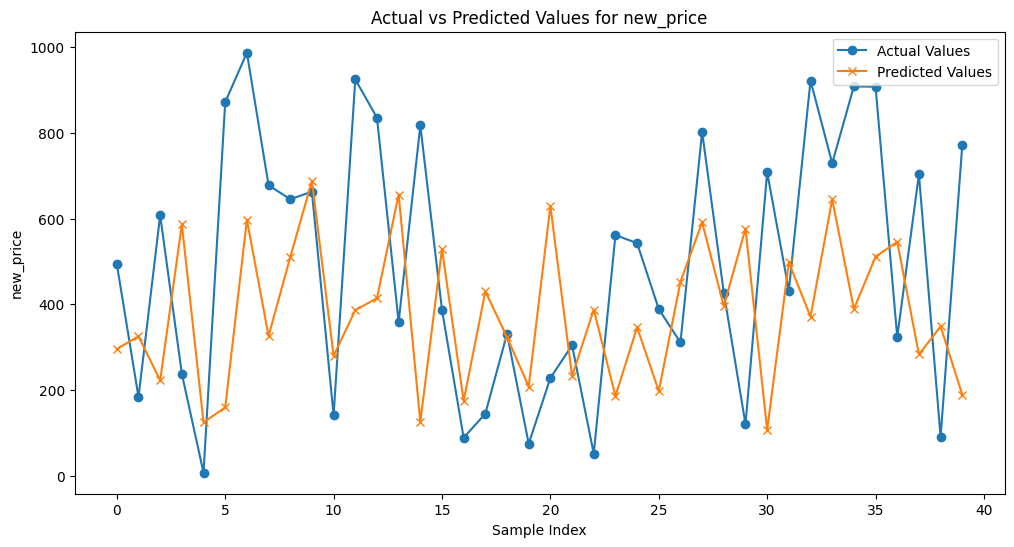


Training model for PI...

Mean Squared Error for PI: 268.4523440259414
R-squared for PI: -34.99136803080294


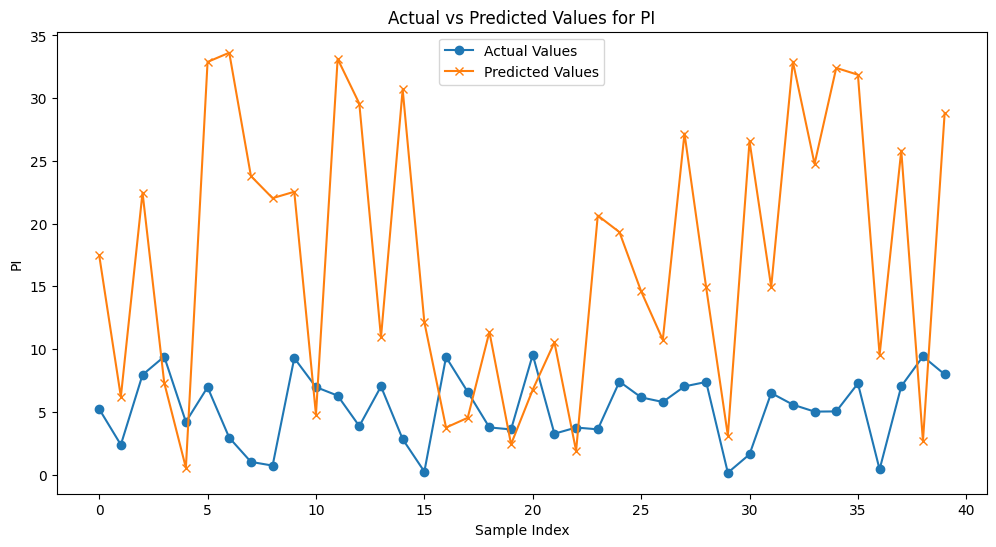


Training model for unit_rate...

Mean Squared Error for unit_rate: 605.4431912395114
R-squared for unit_rate: -1.491836465138035


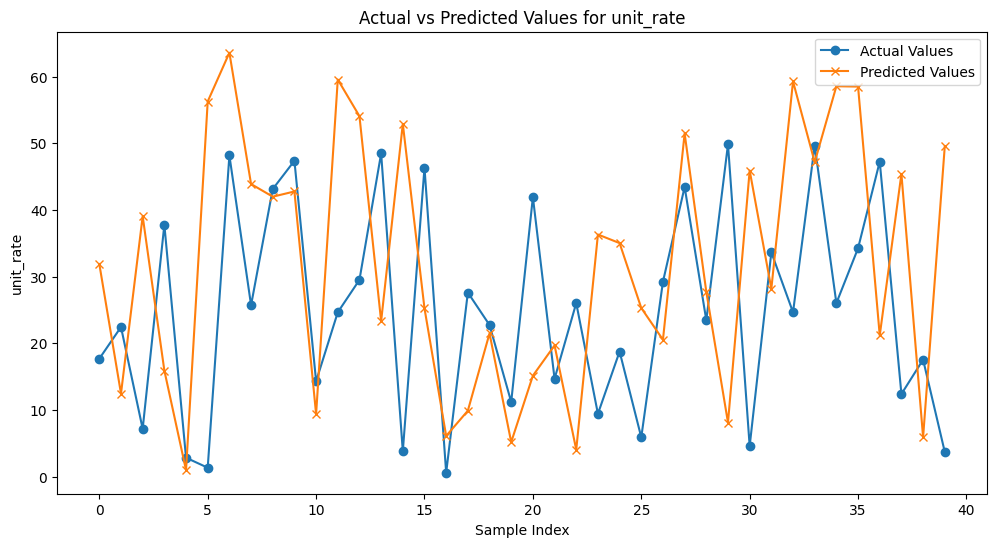

In [83]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming merged_dataset is your DataFrame containing the data
# For demonstration, I'll create a dummy merged_dataset. Replace this with your actual DataFrame.
np.random.seed(42)
n_samples = 200
merged_dataset = pd.DataFrame({
    'new_price': np.random.rand(n_samples) * 1000,
    'PI': np.random.rand(n_samples) * 10,
    'unit_rate': np.random.rand(n_samples) * 50,
    'feature1': np.random.rand(n_samples),
    'feature2': np.random.rand(n_samples),
    'feature3': np.random.rand(n_samples),
    'district': np.random.choice(['A', 'B', 'C'], n_samples),
    'YearQuarter': np.random.choice(['2020Q1', '2020Q2', '2020Q3'], n_samples),
    'Quarter': np.random.choice(['Q1', 'Q2', 'Q3', 'Q4'], n_samples)
})

# List of dependent variables
dependent_vars = ['new_price', 'PI', 'unit_rate']

# Iterate over each dependent variable
for dep_var in dependent_vars:
    print(f'\nTraining model for {dep_var}...\n')

    # Define the features and the target variable
    X = merged_dataset.drop(columns=[dep_var, 'district', 'YearQuarter', 'Quarter'])
    y = merged_dataset[dep_var]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train MLP model
    mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)
    mlp.fit(X_train, y_train)

    # Make predictions
    y_pred = mlp.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error for {dep_var}: {mse}')
    print(f'R-squared for {dep_var}: {r2}')

    # Plot actual vs predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='Actual Values', marker='o')
    plt.plot(y_pred, label='Predicted Values', marker='x')
    plt.title(f'Actual vs Predicted Values for {dep_var}')
    plt.xlabel('Sample Index')
    plt.ylabel(dep_var)
    plt.legend()
    plt.show()

Actual vs Predicted Values for `unit_rate`

The graph shows the actual vs. predicted values for the dependent variable `unit_rate` using an MLP model. The blue line with dots represents the actual values, while the orange line with crosses represents the predicted values. The model's performance is evaluated through two metrics:
- **Mean Squared Error (MSE) for `unit_rate`:** 605.4431912395114
- **R-squared for `unit_rate`:** -1.491836465138035

From the graph, it is evident that the predicted values fluctuate significantly around the actual values, indicating that the model did not perform well in accurately predicting the `unit_rate`

Actual vs Predicted Values for `PI`

The graph shows the actual vs. predicted values for the dependent variable `PI` using an MLP model. The blue line with dots represents the actual values, while the orange line with crosses represents the predicted values. The model's performance is evaluated through two metrics:
- **Mean Squared Error (MSE) for `PI`:** 268.4523440259414
- **R-squared for `PI`:** -34.99136803080294

From the graph, it is evident that the predicted values do not match the actual values well, indicating that the model did not perform well in accurately predicting the `PI`.

Actual vs Predicted Values for `new_price`

The graph shows the actual vs. predicted values for the dependent variable `new_price` using an MLP model. The blue line with dots represents the actual values, while the orange line with crosses represents the predicted values. The model's performance is evaluated through two metrics:
- **Mean Squared Error (MSE) for `new_price`:** 120750.30876926915
- **R-squared for `new_price`:** -0.39219975685250397

From the graph, it is evident that the predicted values have significant deviations from the actual values, indicating that the model did not perform well in accurately predicting the `new_price`.